## Business Case:- Predictive Modeling for Laptop Prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('laptop_prices.csv')

In [3]:
data

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


## Domain Analysis

**Understanding the Data**

### Categorical Features:

* **Company:** The brand of the laptop.
* **Product:** A unique identifier for each laptop model.
* **TypeName:** The general type of laptop (e.g., Notebook, Ultrabook).
* **OS:** The operating system installed on the laptop.
* **Screen:** The type of screen (e.g., HD, Full HD).
* **Touchscreen:** Whether the laptop has a touchscreen.
* **PrimaryStorageType:** The type of primary storage (e.g., SSD, HDD).
* **SecondaryStorageType:** The type of secondary storage (if present).
* **IPSpanel:** Whether the screen uses IPS technology.
* **RetinaDisplay:** Whether the screen has a Retina display.
* **CPU_company:** The manufacturer of the CPU.
* **GPU_company:** The manufacturer of the GPU.

### Numerical Features:

* **Inches:** The screen size in inches.
* **Ram:** The amount of RAM in the laptop.
* **Weight:** The weight of the laptop.
* **Price_euros:** The price of the laptop in euros.
* **Screenw:** The width of the screen.
* **ScreenH:** The height of the screen.
* **PrimaryStorage:** The storage capacity of the primary storage.
* **SecondaryStorage:** The storage capacity of the secondary storage.
* **CPU_freq:** The clock speed of the CPU.


## Basic Check

In [4]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [5]:
data.nunique()

Company                  19
Product                 618
TypeName                  6
Inches                   18
Ram                       9
OS                        9
Weight                  171
Price_euros             791
Screen                    4
ScreenW                  13
ScreenH                  10
Touchscreen               2
IPSpanel                  2
RetinaDisplay             2
CPU_company               3
CPU_freq                 25
CPU_model                93
PrimaryStorage           13
SecondaryStorage          6
PrimaryStorageType        4
SecondaryStorageType      4
GPU_company               4
GPU_model               110
dtype: int64

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [8]:
data.shape

(1275, 23)

In [9]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [10]:
data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [11]:
data.tail()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.0,Full HD,1920,1080,Yes,Yes,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.0,Quad HD+,3200,1800,Yes,Yes,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.0,Standard,1366,768,No,No,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.0,Standard,1366,768,No,No,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,4,Windows 10,2.20,369.0,Standard,1366,768,No,No,No,Intel,1.6,Celeron Dual Core N3050,500,0,HDD,No,Intel,HD Graphics


In [12]:
data.nunique()

Company                  19
Product                 618
TypeName                  6
Inches                   18
Ram                       9
OS                        9
Weight                  171
Price_euros             791
Screen                    4
ScreenW                  13
ScreenH                  10
Touchscreen               2
IPSpanel                  2
RetinaDisplay             2
CPU_company               3
CPU_freq                 25
CPU_model                93
PrimaryStorage           13
SecondaryStorage          6
PrimaryStorageType        4
SecondaryStorageType      4
GPU_company               4
GPU_model               110
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [14]:
data.isnull().sum()  ## There is no null values

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [15]:
data.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [16]:
data.describe(include='O')

,Company,Product,TypeName,OS,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_model,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
count,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275
unique,19,618,6,9,4,2,2,2,3,93,4,4,4,110
top,Dell,XPS 13,Notebook,Windows 10,Full HD,No,No,No,Intel,Core i5 7200U,SSD,No,Intel,HD Graphics 620
freq,291,30,707,1048,835,1087,918,1258,1214,193,837,1067,704,279


In [17]:
data.duplicated().sum()  ## check duplicated values

0

In [18]:
data.isnull().sum()  ## check NaN values

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [19]:
## select categorical columns
cat_col = data.select_dtypes(include='O')
cat_col.columns

Index(['Company', 'Product', 'TypeName', 'OS', 'Screen', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_model',
       'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company',
       'GPU_model'],
      dtype='object')

In [20]:
for i in cat_col.drop(['Product','CPU_model','GPU_model'],axis=1):
    print(i,cat_col[i].unique())
    print(cat_col[i].value_counts())
    print('**********************************************************************')

Company ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
**********************************************************************
TypeName ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
TypeName
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64
**********************************************************************
OS ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 

In [21]:
## Select the numerical columns
num_col = data.select_dtypes(include=['int','float'])
num_col.columns

Index(['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH',
       'CPU_freq', 'PrimaryStorage', 'SecondaryStorage'],
      dtype='object')

## Exploratory Data Analysis

### Univariate analysis using sweetviz

In [22]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [23]:
data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


<Axes: ylabel='count'>

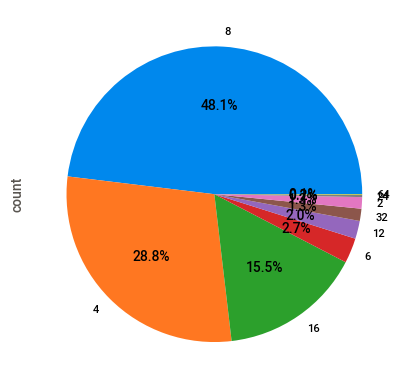

In [24]:
data.Ram.value_counts().plot(kind='pie',autopct='%1.1f%%')

Text(0.5, 1.0, 'Touchscreen in Ram')

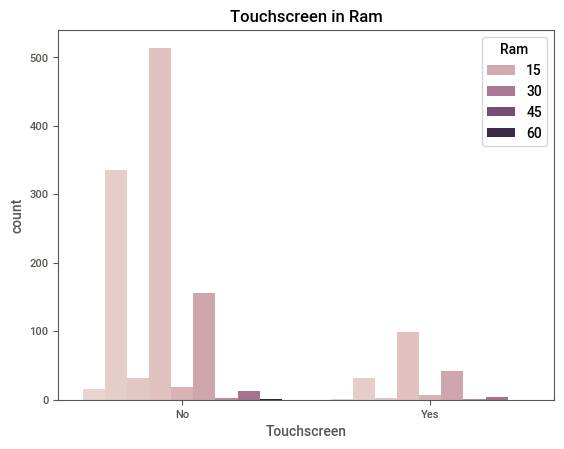

In [25]:
sns.countplot(x='Touchscreen',data=data,hue='Ram')
plt.title('Touchscreen in Ram')


<Axes: xlabel='RetinaDisplay', ylabel='count'>

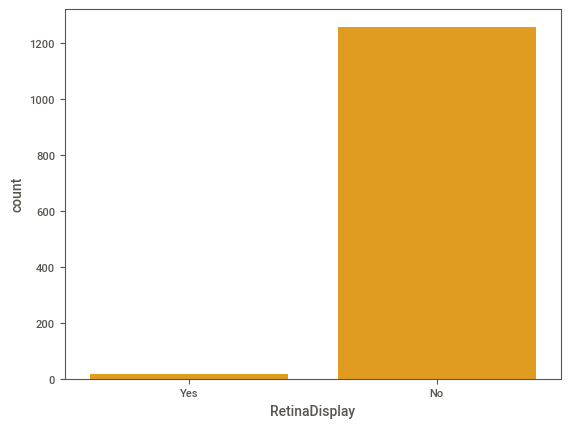

In [26]:
sns.countplot(x='RetinaDisplay',data=data,color='orange')

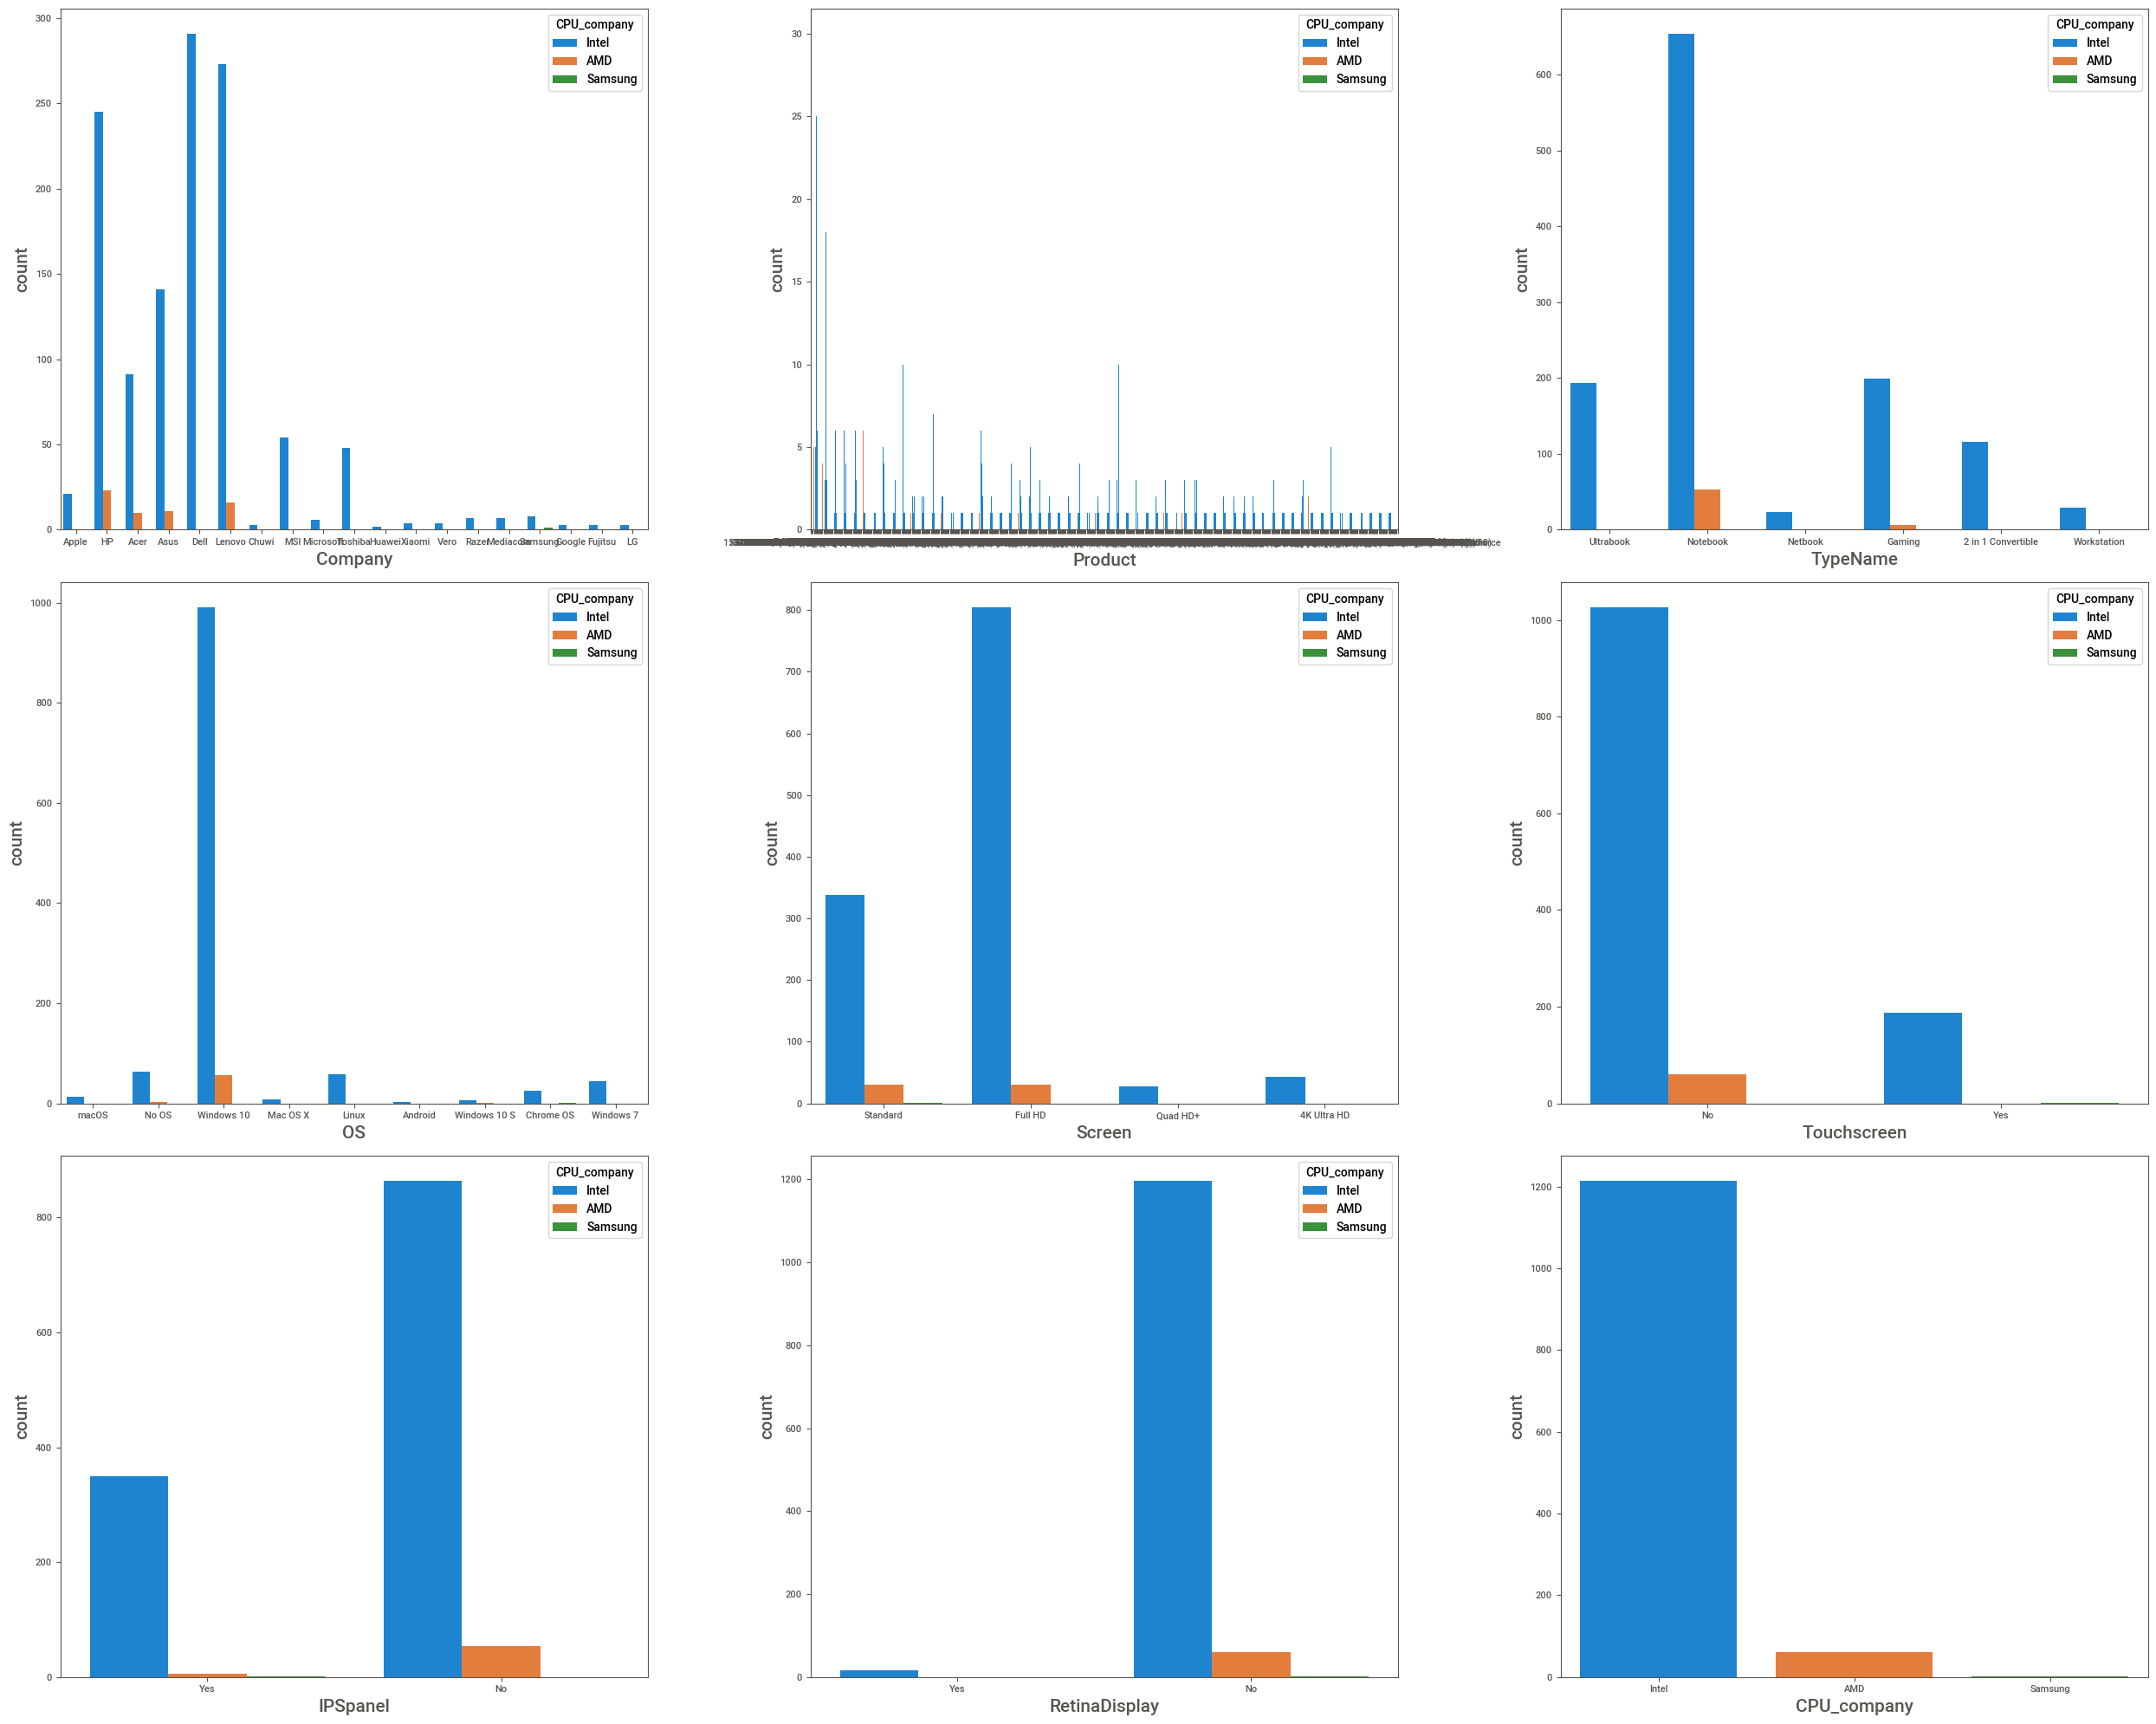

In [27]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in cat_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=cat_col[i],data=cat_col,hue='CPU_company')
        plt.xlabel(i,fontsize=15)
        plt.ylabel('count',fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Bivariate Analysis

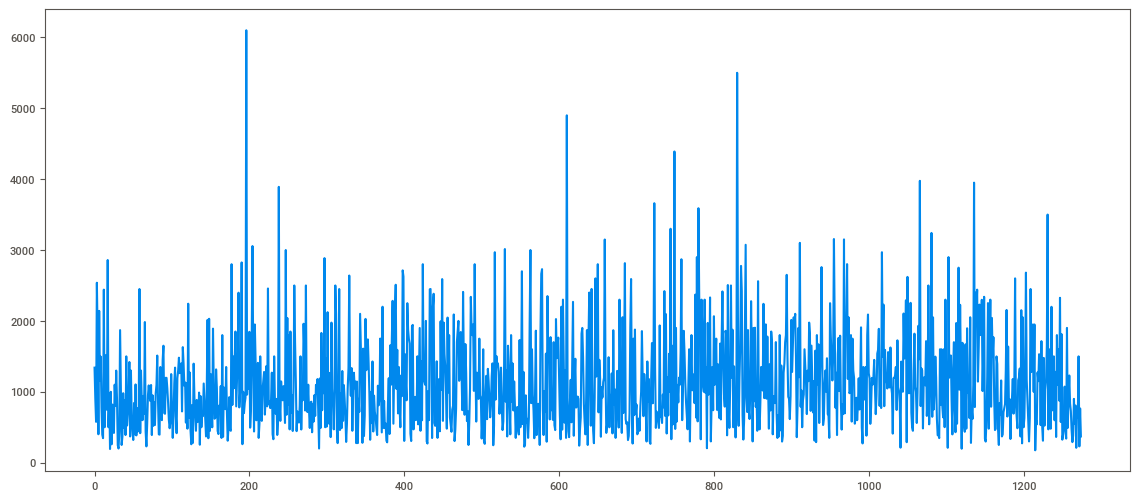

In [28]:
plt.figure(figsize=(14,6))
plt.plot(data['Price_euros'])

<Axes: xlabel='ScreenW', ylabel='ScreenH'>

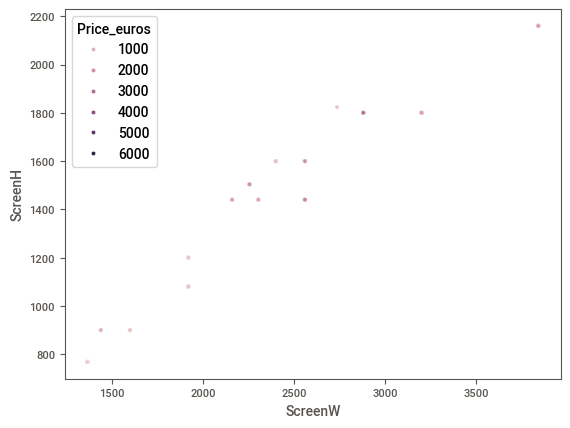

In [29]:
sns.scatterplot(x='ScreenW',y='ScreenH',data=data,hue='Price_euros')

<Axes: xlabel='Company', ylabel='Price_euros'>

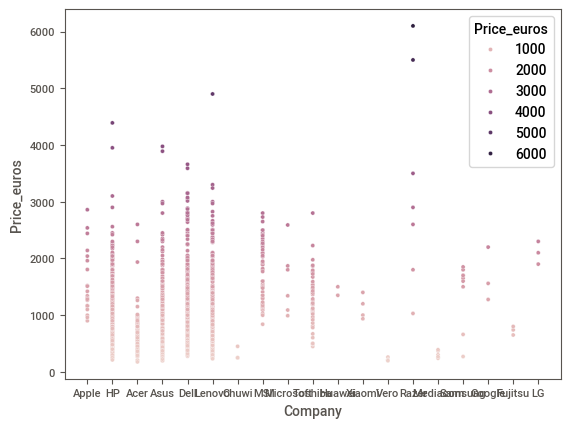

In [30]:
sns.scatterplot(x='Company',y='Price_euros',data=data,hue='Price_euros')

<Axes: xlabel='Company', ylabel='Price_euros'>

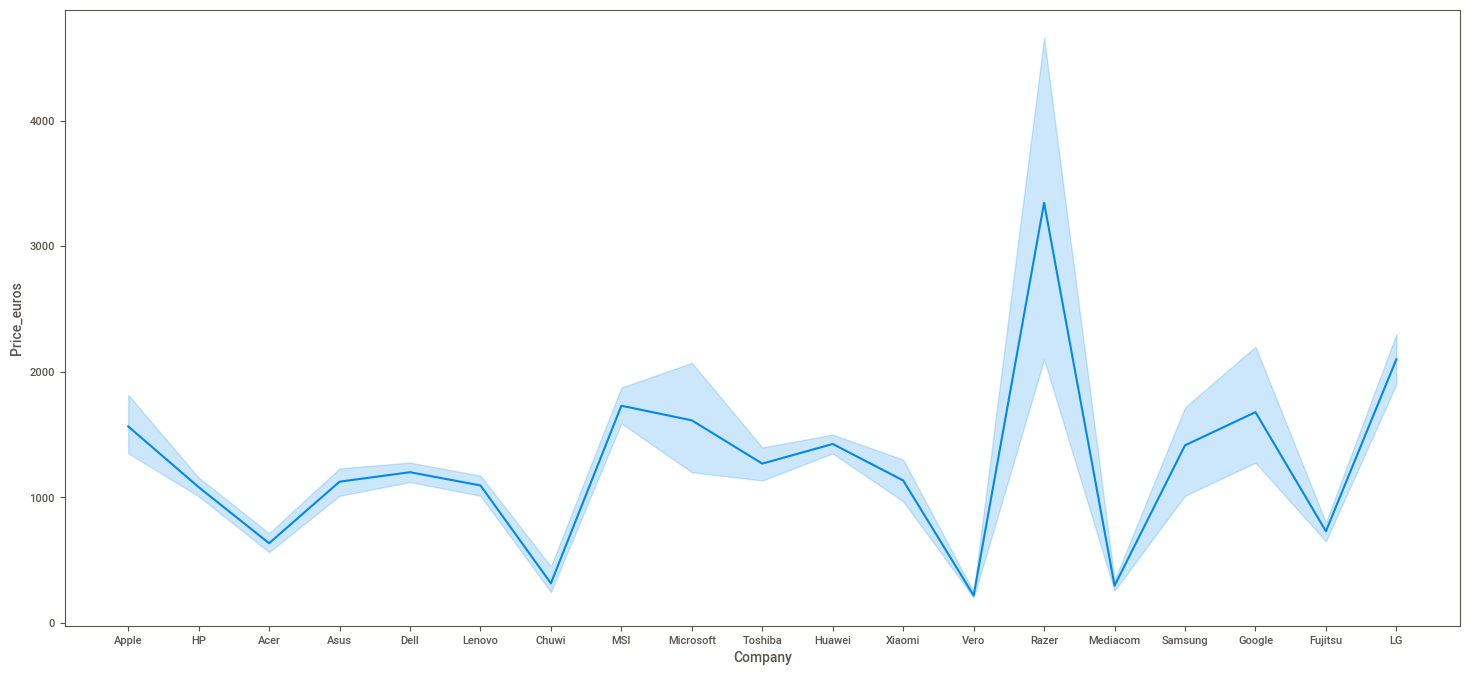

In [31]:
plt.figure(figsize=(18,8))
sns.lineplot(x='Company',y='Price_euros',data=data)

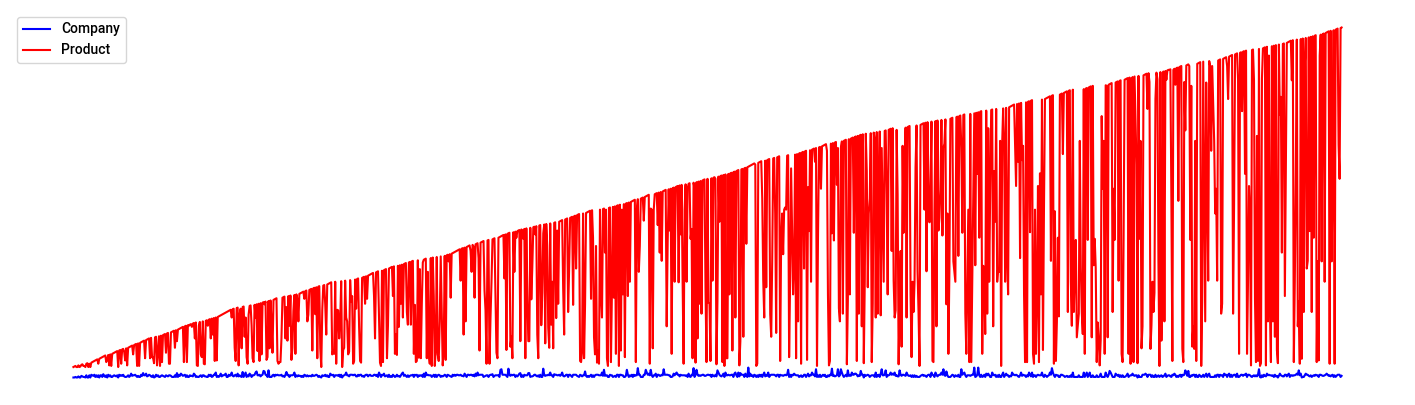

In [32]:
plt.figure(figsize=(18,5))
plt.plot(data['Company'], label = ('Company'),color='blue')
plt.plot(data['Product'], label = ('Product'), color = 'red')
plt.legend()
plt.axis('off')
plt.grid()

<Axes: xlabel='Ram', ylabel='PrimaryStorage'>

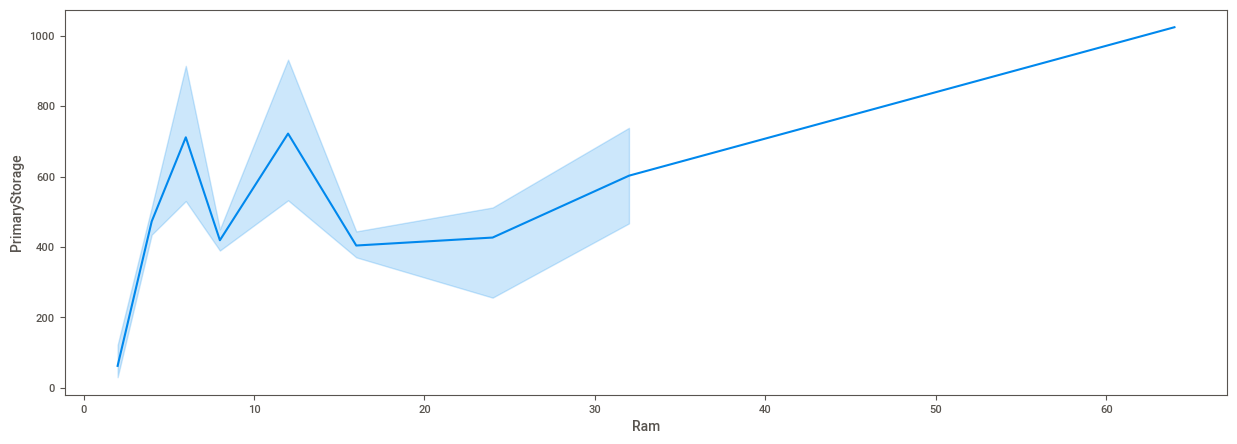

In [33]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Ram',y='PrimaryStorage',data=data)

<Axes: xlabel='Company', ylabel='Price_euros'>

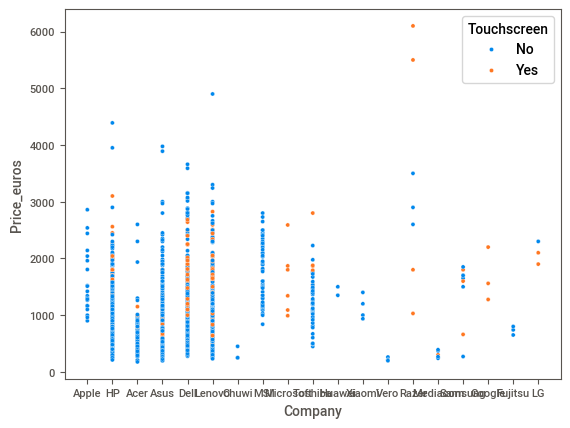

In [34]:
sns.scatterplot(x='Company',y='Price_euros',data=data,hue='Touchscreen')

<Axes: xlabel='Company', ylabel='Price_euros'>

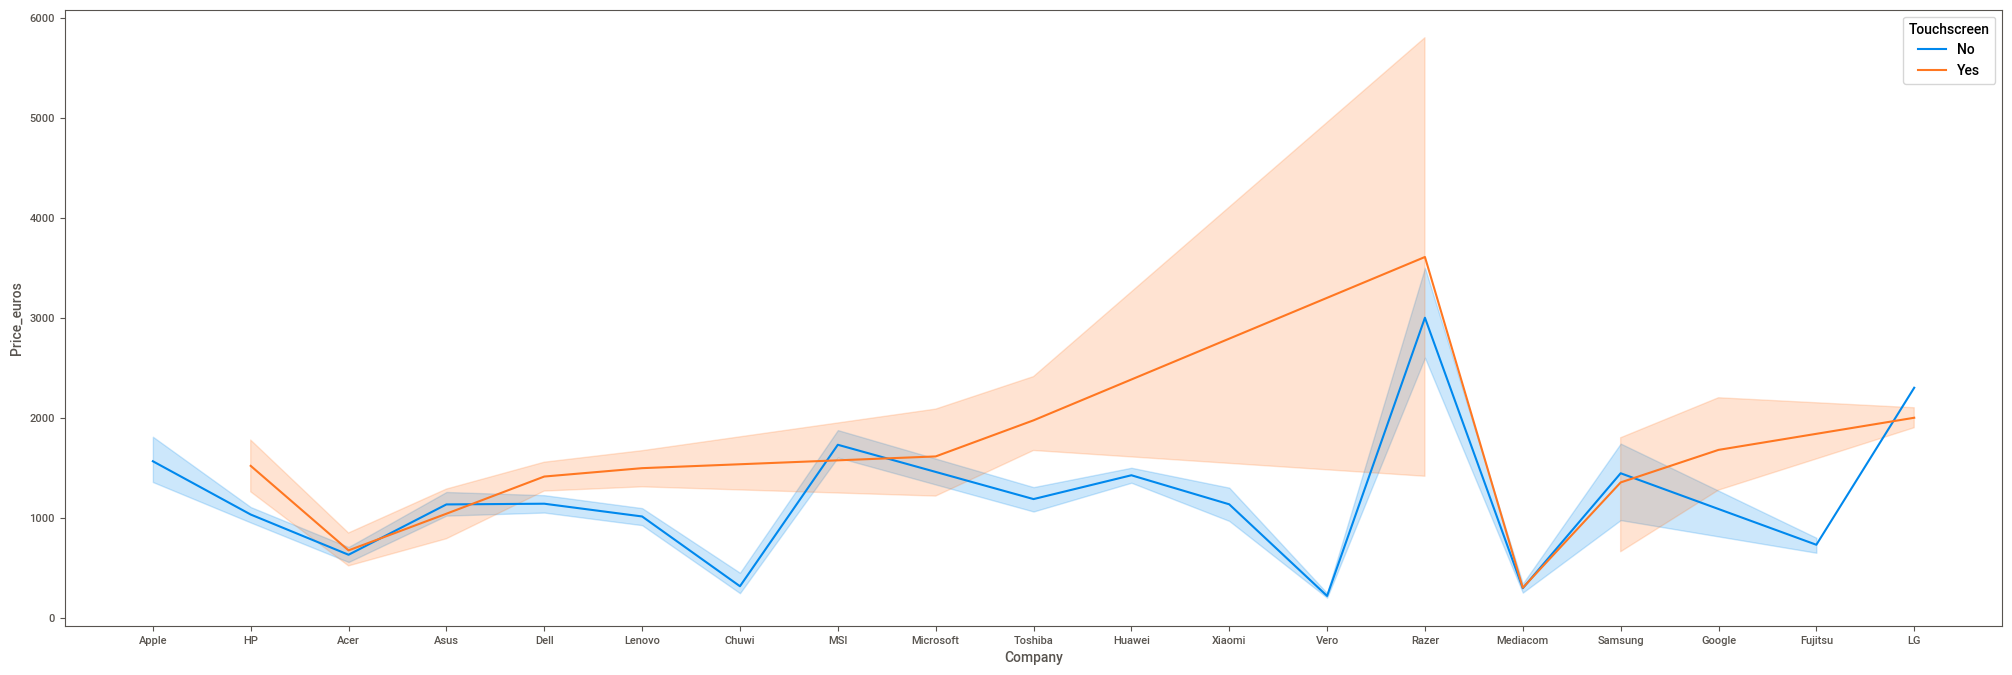

In [35]:
plt.figure(figsize=(25,8))
sns.lineplot(x='Company',y='Price_euros',data=data,hue='Touchscreen')

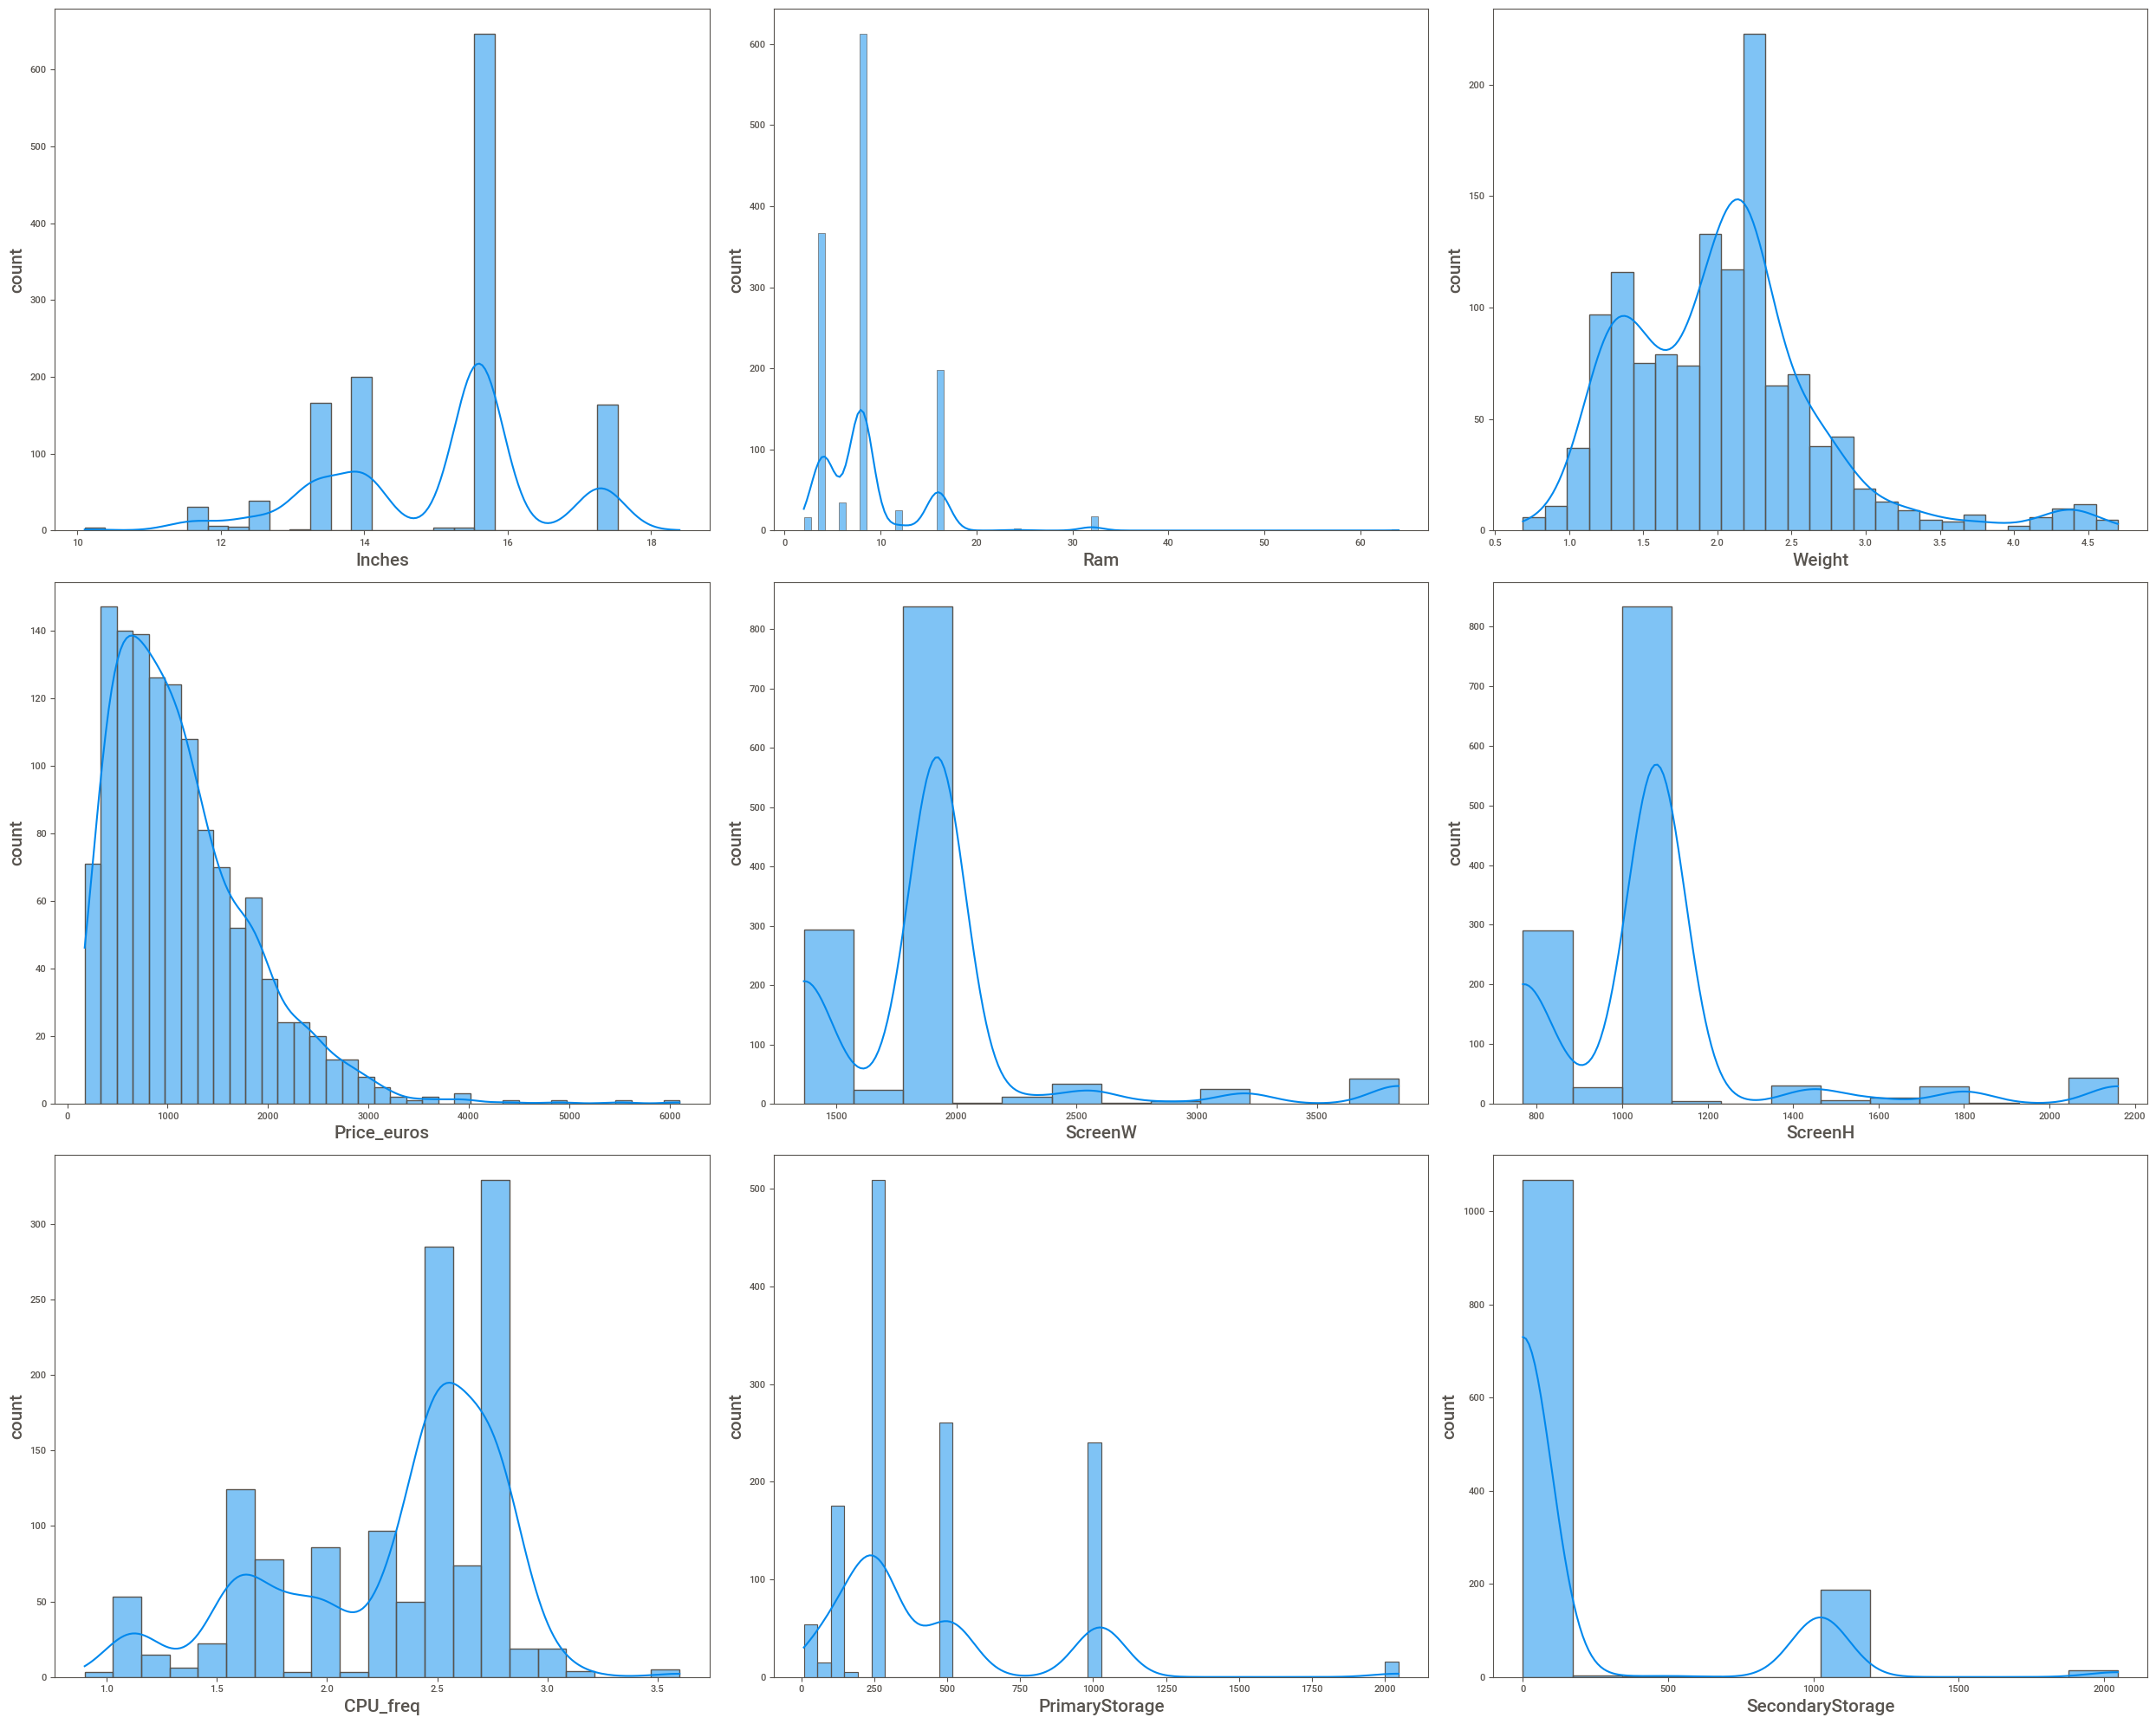

In [36]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in num_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(num_col[i],kde=True)
        plt.xlabel(i,fontsize=15)
        plt.ylabel('count',fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Insights

### **Inches**
* The distribution is skewed to the right, indicating that there are more laptops with smaller screen sizes.
* The peak is around 15 inches, suggesting that this is the most common screen size.

### **Ram**
* The distribution is also skewed to the right, with a peak around 8GB. This indicates that most laptops have 8GB of RAM, but there are some with significantly more.

### **Weight**
* The distribution is somewhat bimodal, with peaks around 1.5 kg and 2.5 kg. This suggests that there are two main groups of laptops: lighter models (likely ultrabooks) and heavier models (possibly gaming laptops or desktop replacements).

### **Price_euros**
* The distribution is skewed to the right, with a long tail indicating that there are some very expensive laptops.
* The peak is around 1000 euros, suggesting that this is the most common price range.

### **ScreenW**
* The distribution is relatively symmetric, with a peak around 1200 pixels. This indicates that most laptops have a screen width of 1200 pixels, with some variation.

### **ScreenH**
* The distribution is similar to ScreenW, with a peak around 800 pixels. This suggests that most laptops have a screen height of 800 pixels.

### **CPU_freq**
* The distribution is skewed to the right, with a peak around 2.5 GHz. This indicates that most laptops have a CPU frequency of 2.5 GHz, but there are some with higher frequencies.

### **PrimaryStorage**
* The distribution is skewed to the right, with a peak around 500 GB. This suggests that most laptops have a primary storage capacity of 500 GB, but there are some with larger capacities.

### **SecondaryStorage**
* The distribution is heavily skewed to the right, with a long tail indicating that a small number of laptops have very large secondary storage capacities.
ns:

### **Company**
* The distribution is highly skewed, with a few companies having a significantly higher number of laptops in the dataset.
* **Apple** and **HP** appear to be the dominant brands.

### **Product**
* The distribution is highly skewed, with most products having low counts. This suggests that the dataset contains a variety of laptop models, with some models being more common than others.

### **TypeName**
* The distribution is skewed to the right, with **Notebook** being the most common type of laptop.
* **Ultrabook** and **Gaming** are also represented, but to a lesser extent.

### **OS**
* The distribution is relatively balanced, with **macOS** and **Windows** being the two most common operating systems.

### **Screen**
* The distribution is skewed to the right, with **Standard** being the most common screen type.
* **Full HD** and **Quad HD+** are also represented, but to a lesser extent.

### **Touchscreen**
* The distribution is skewed to the left, with most laptops **not** having a touchscreen.

### **IPSpanel**
* The distribution is skewed to the left, with most laptops **not** having an IPS panel.

### **RetinaDisplay**
* The distribution is highly skewed to the left, with very few laptops having a Retina display.

### **CPU_company**
* The distribution is skewed to the right, with **Intel** being the dominant CPU manufacturer.
* **AMD** is also rke informed decisions when purchasing a laptop.



## Check outliers

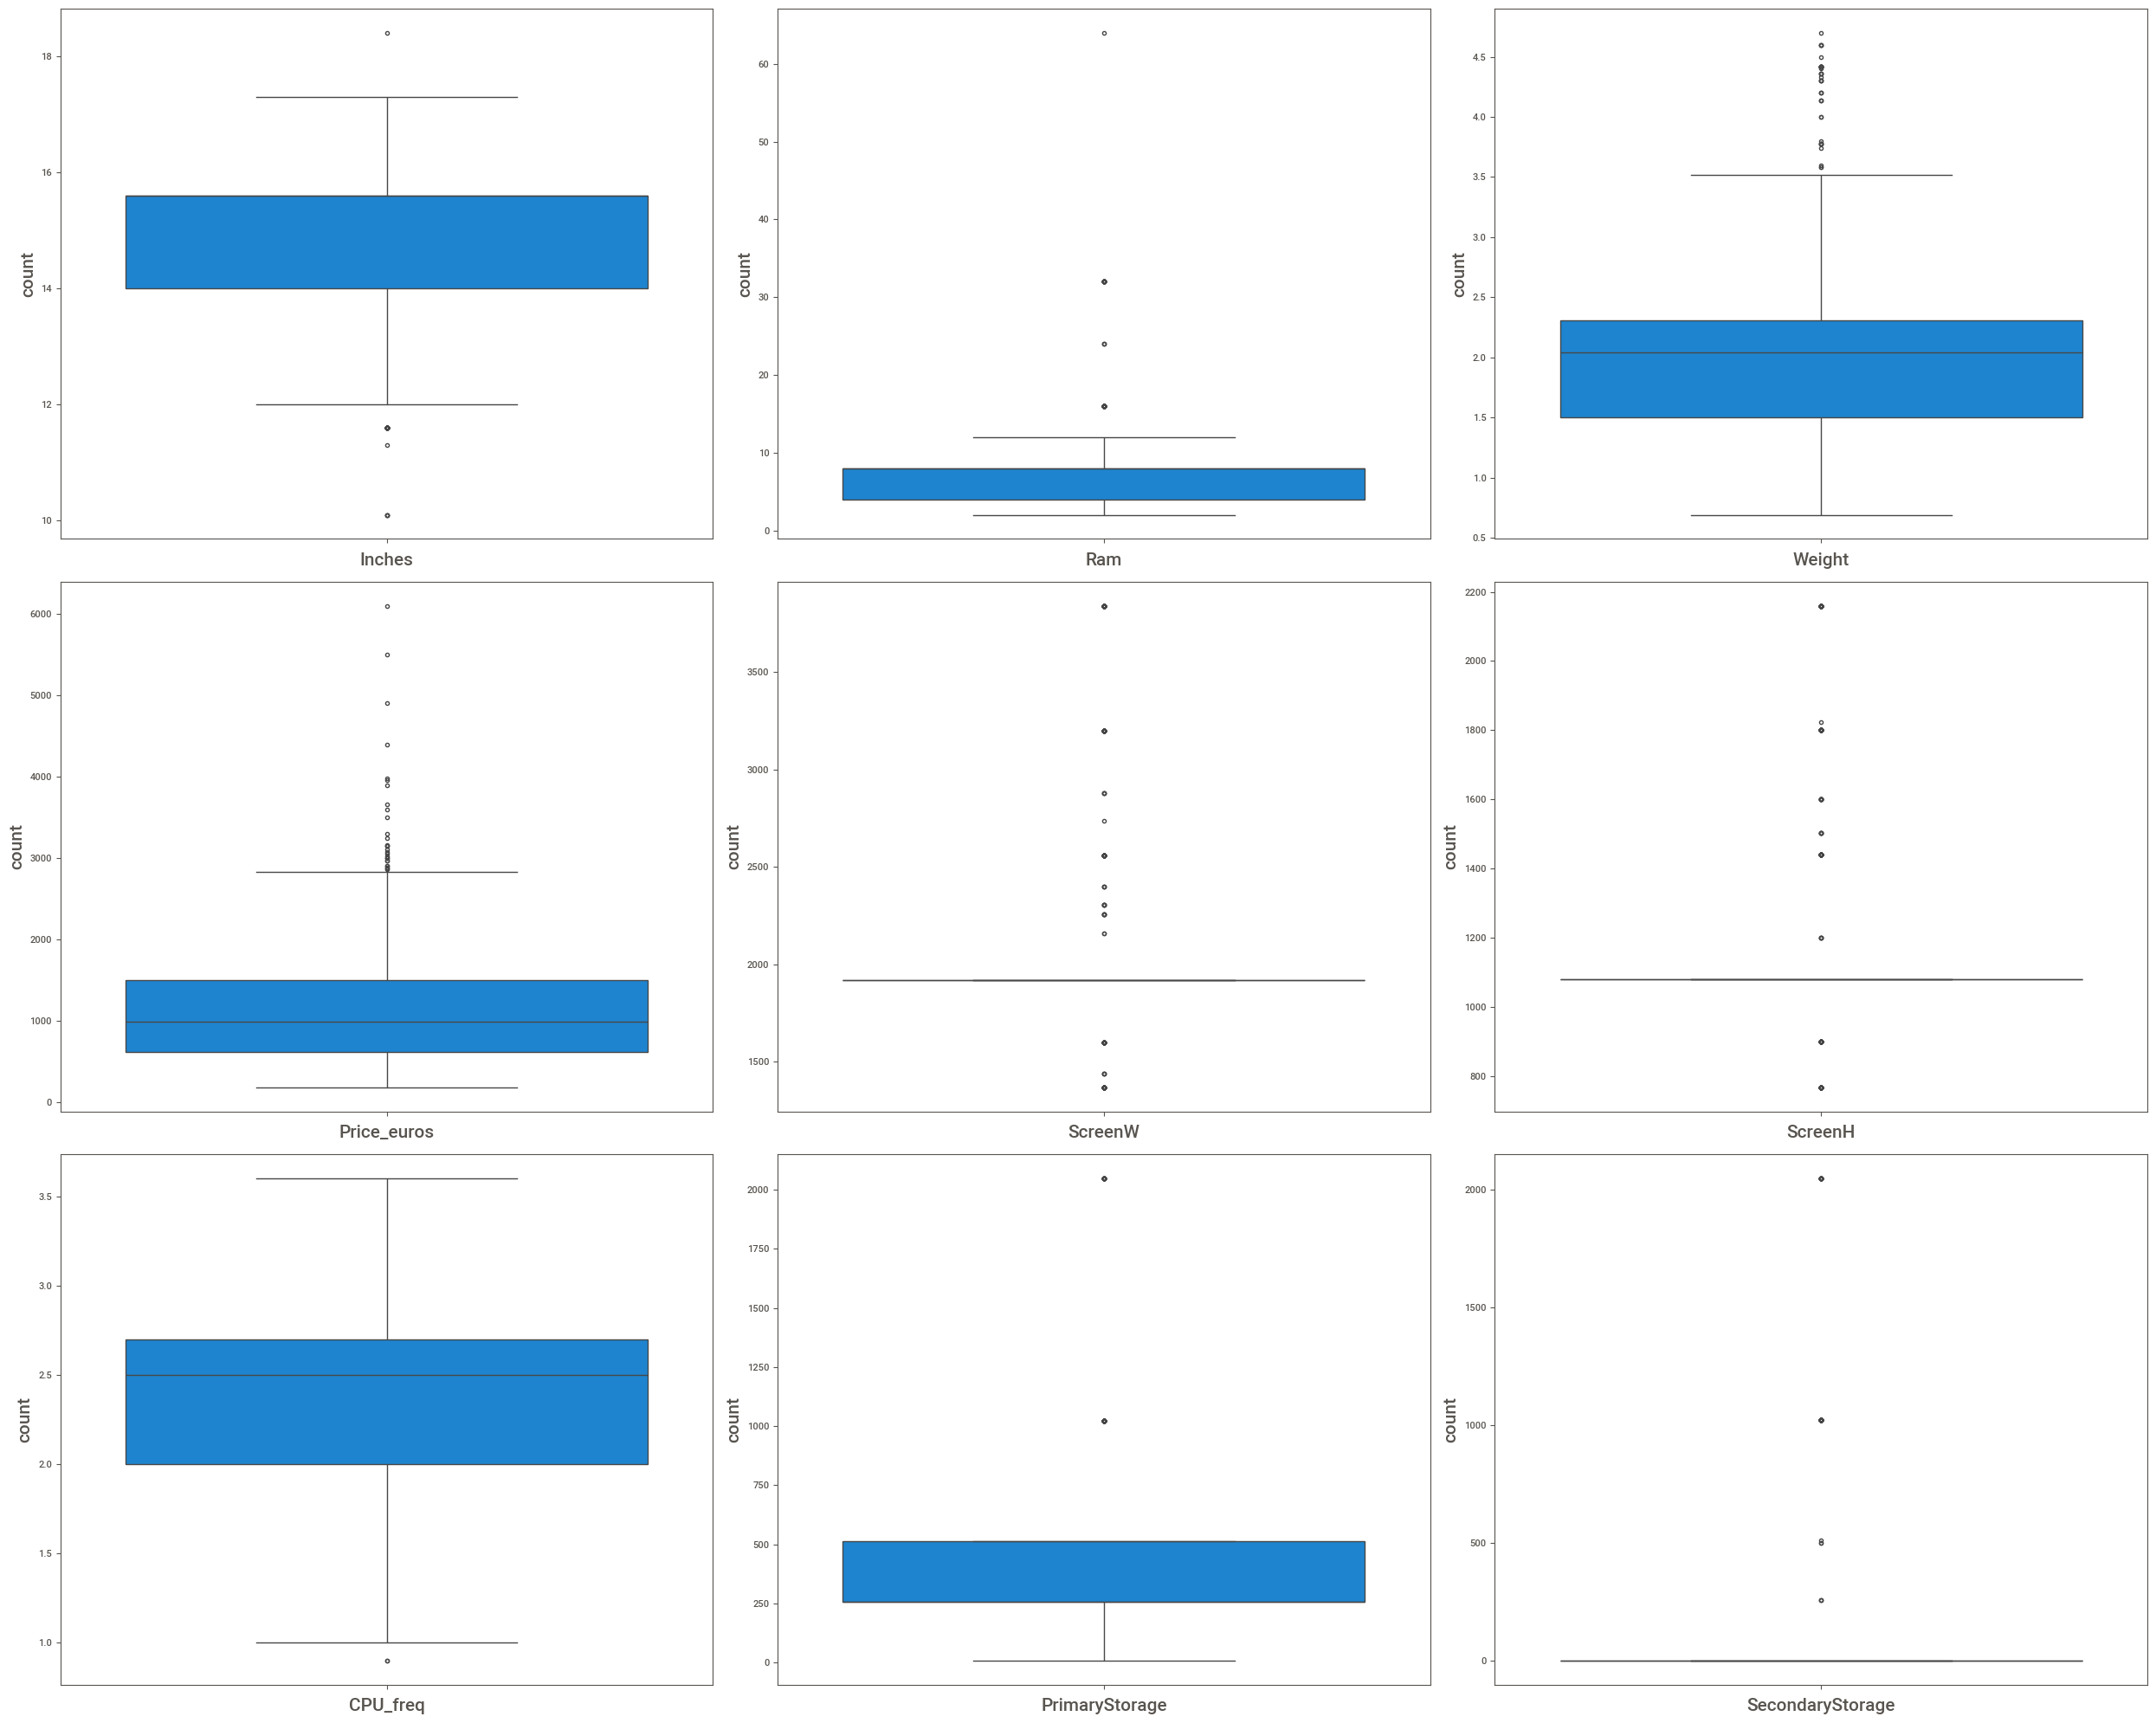

In [37]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in num_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(num_col[i])
        plt.xlabel(i,fontsize=15)
        plt.ylabel('count',fontsize=15)
    plotnumber+=1
plt.tight_layout()

<Axes: >

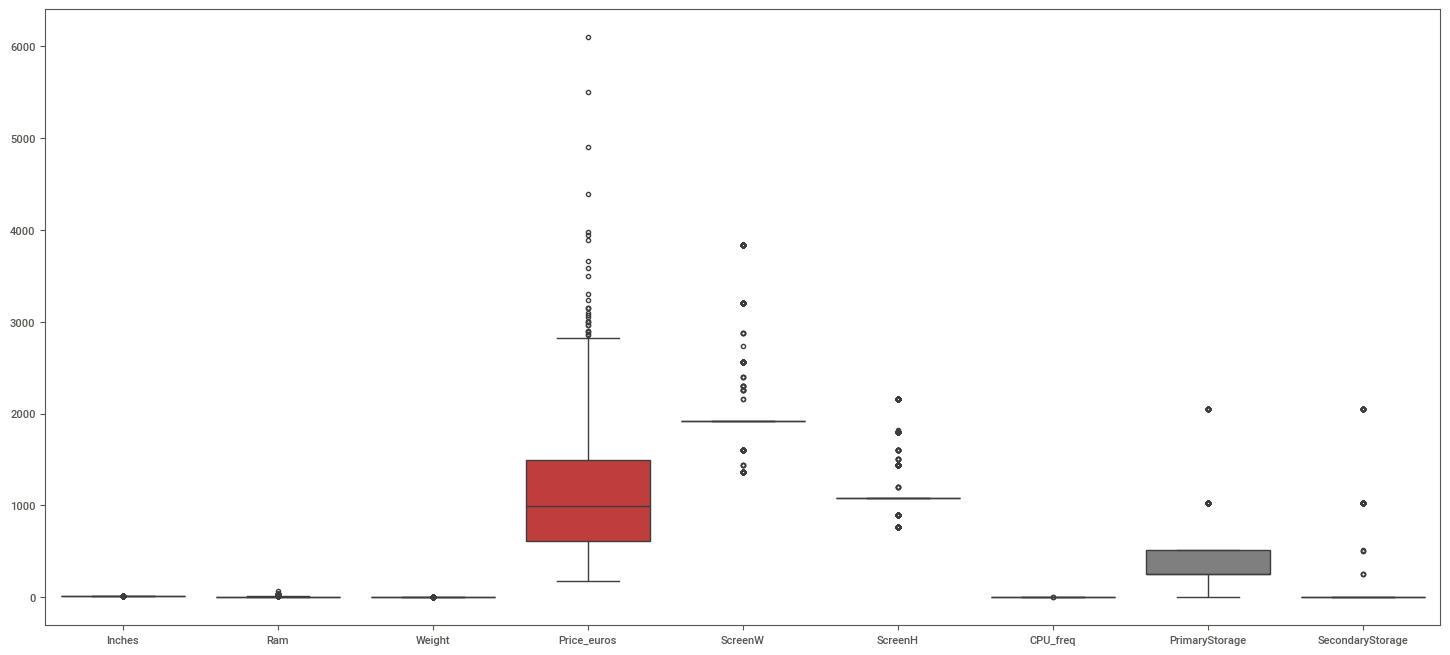

In [38]:
fig , ax = plt.subplots(figsize=(18,8))
sns.boxplot(data=data,ax = ax)

In [39]:
## Inches
Q3 = data.Inches.quantile(0.75)
Q1 = data.Inches.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [40]:
len(data.loc[data['Inches']>upper_limit])/len(data)*100

0.0784313725490196

In [41]:
data['Inches'].mode()

0    15.6
Name: Inches, dtype: float64

In [42]:
data.head(3)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620


In [43]:
data.loc[data['Inches'] > upper_limit,'Inches']=data['Inches'].median()

In [44]:
data.loc[data['Inches'] > upper_limit]

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model


In [45]:
len(data.loc[data['Inches']<lower_limit])/len(data)*100

2.823529411764706

In [46]:
data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [47]:
Q3 = data.Ram.quantile(0.75)
Q1 = data.Ram.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [48]:
len(data.loc[data['Ram']>upper_limit])/len(data)*100

17.176470588235293

In [49]:
len(data.loc[data['Ram']<lower_limit])/len(data)*100

0.0

In [50]:
Q3 = data.Weight.quantile(0.75)
Q1 = data.Weight.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [51]:
len(data.loc[data['Weight']>upper_limit])/len(data)*100

3.5294117647058822

In [52]:
len(data.loc[data['Weight']<lower_limit])/len(data)*100

0.0

In [53]:
data.loc[data['Weight']>upper_limit].shape

(45, 23)

In [54]:
data.loc[data['Weight']>upper_limit,'Weight']=data['Weight'].median()

In [55]:
data.loc[data['Weight']>upper_limit]

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model


In [56]:
Q3 = data.Price_euros.quantile(0.75)
Q1 = data.Price_euros.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [57]:
len(data.loc[data['Price_euros']>upper_limit])/len(data)*100

2.196078431372549

In [58]:
len(data.loc[data['Price_euros']<lower_limit])/len(data)*100

0.0

In [59]:
data.loc[data['Price_euros']>upper_limit].shape

(28, 23)

In [60]:
data.Price_euros.mean()

1134.9690588235292

In [61]:
data.loc[data['Price_euros']>upper_limit,'Price_euros']=data['Price_euros'].mean()

In [62]:
data.loc[data['Price_euros']>upper_limit].shape

(0, 23)

In [63]:
Q3 = data.ScreenW.quantile(0.75)
Q1 = data.ScreenW.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [64]:
len(data.loc[data['ScreenW']>upper_limit])/len(data)*100

9.411764705882353

In [65]:
len(data.loc[data['ScreenW']<lower_limit])/len(data)*100

24.862745098039216

In [66]:
Q3 = data.ScreenH.quantile(0.75)
Q1 = data.ScreenH.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [67]:
len(data.loc[data['ScreenH']>upper_limit])/len(data)*100

9.803921568627452

In [68]:
len(data.loc[data['ScreenH']<lower_limit])/len(data)*100

24.862745098039216

In [69]:
data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [70]:
Q3 = data.CPU_freq.quantile(0.75)
Q1 = data.CPU_freq.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [71]:
len(data.loc[data['CPU_freq']>upper_limit])/len(data)*100

0.0

In [72]:
len(data.loc[data['CPU_freq']<lower_limit])/len(data)*100

0.1568627450980392

In [73]:
data.loc[data['CPU_freq']<lower_limit].shape

(2, 23)

In [74]:
data.loc[data['CPU_freq']<lower_limit,'CPU_freq']=data['CPU_freq'].median()

In [75]:
data.loc[data['CPU_freq']<lower_limit]

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model


In [76]:
Q3 = data.PrimaryStorage.quantile(0.75)
Q1 = data.PrimaryStorage.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [77]:
len(data.loc[data['PrimaryStorage']>upper_limit])/len(data)*100

20.07843137254902

In [78]:
len(data.loc[data['PrimaryStorage']<lower_limit])/len(data)*100

0.0

In [79]:
Q3 = data.SecondaryStorage.quantile(0.75)
Q1 = data.SecondaryStorage.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [80]:
len(data.loc[data['SecondaryStorage']>upper_limit])/len(data)*100

16.31372549019608

In [81]:
len(data.loc[data['SecondaryStorage']<lower_limit])/len(data)*100

0.0

## Checking Handling Outliers

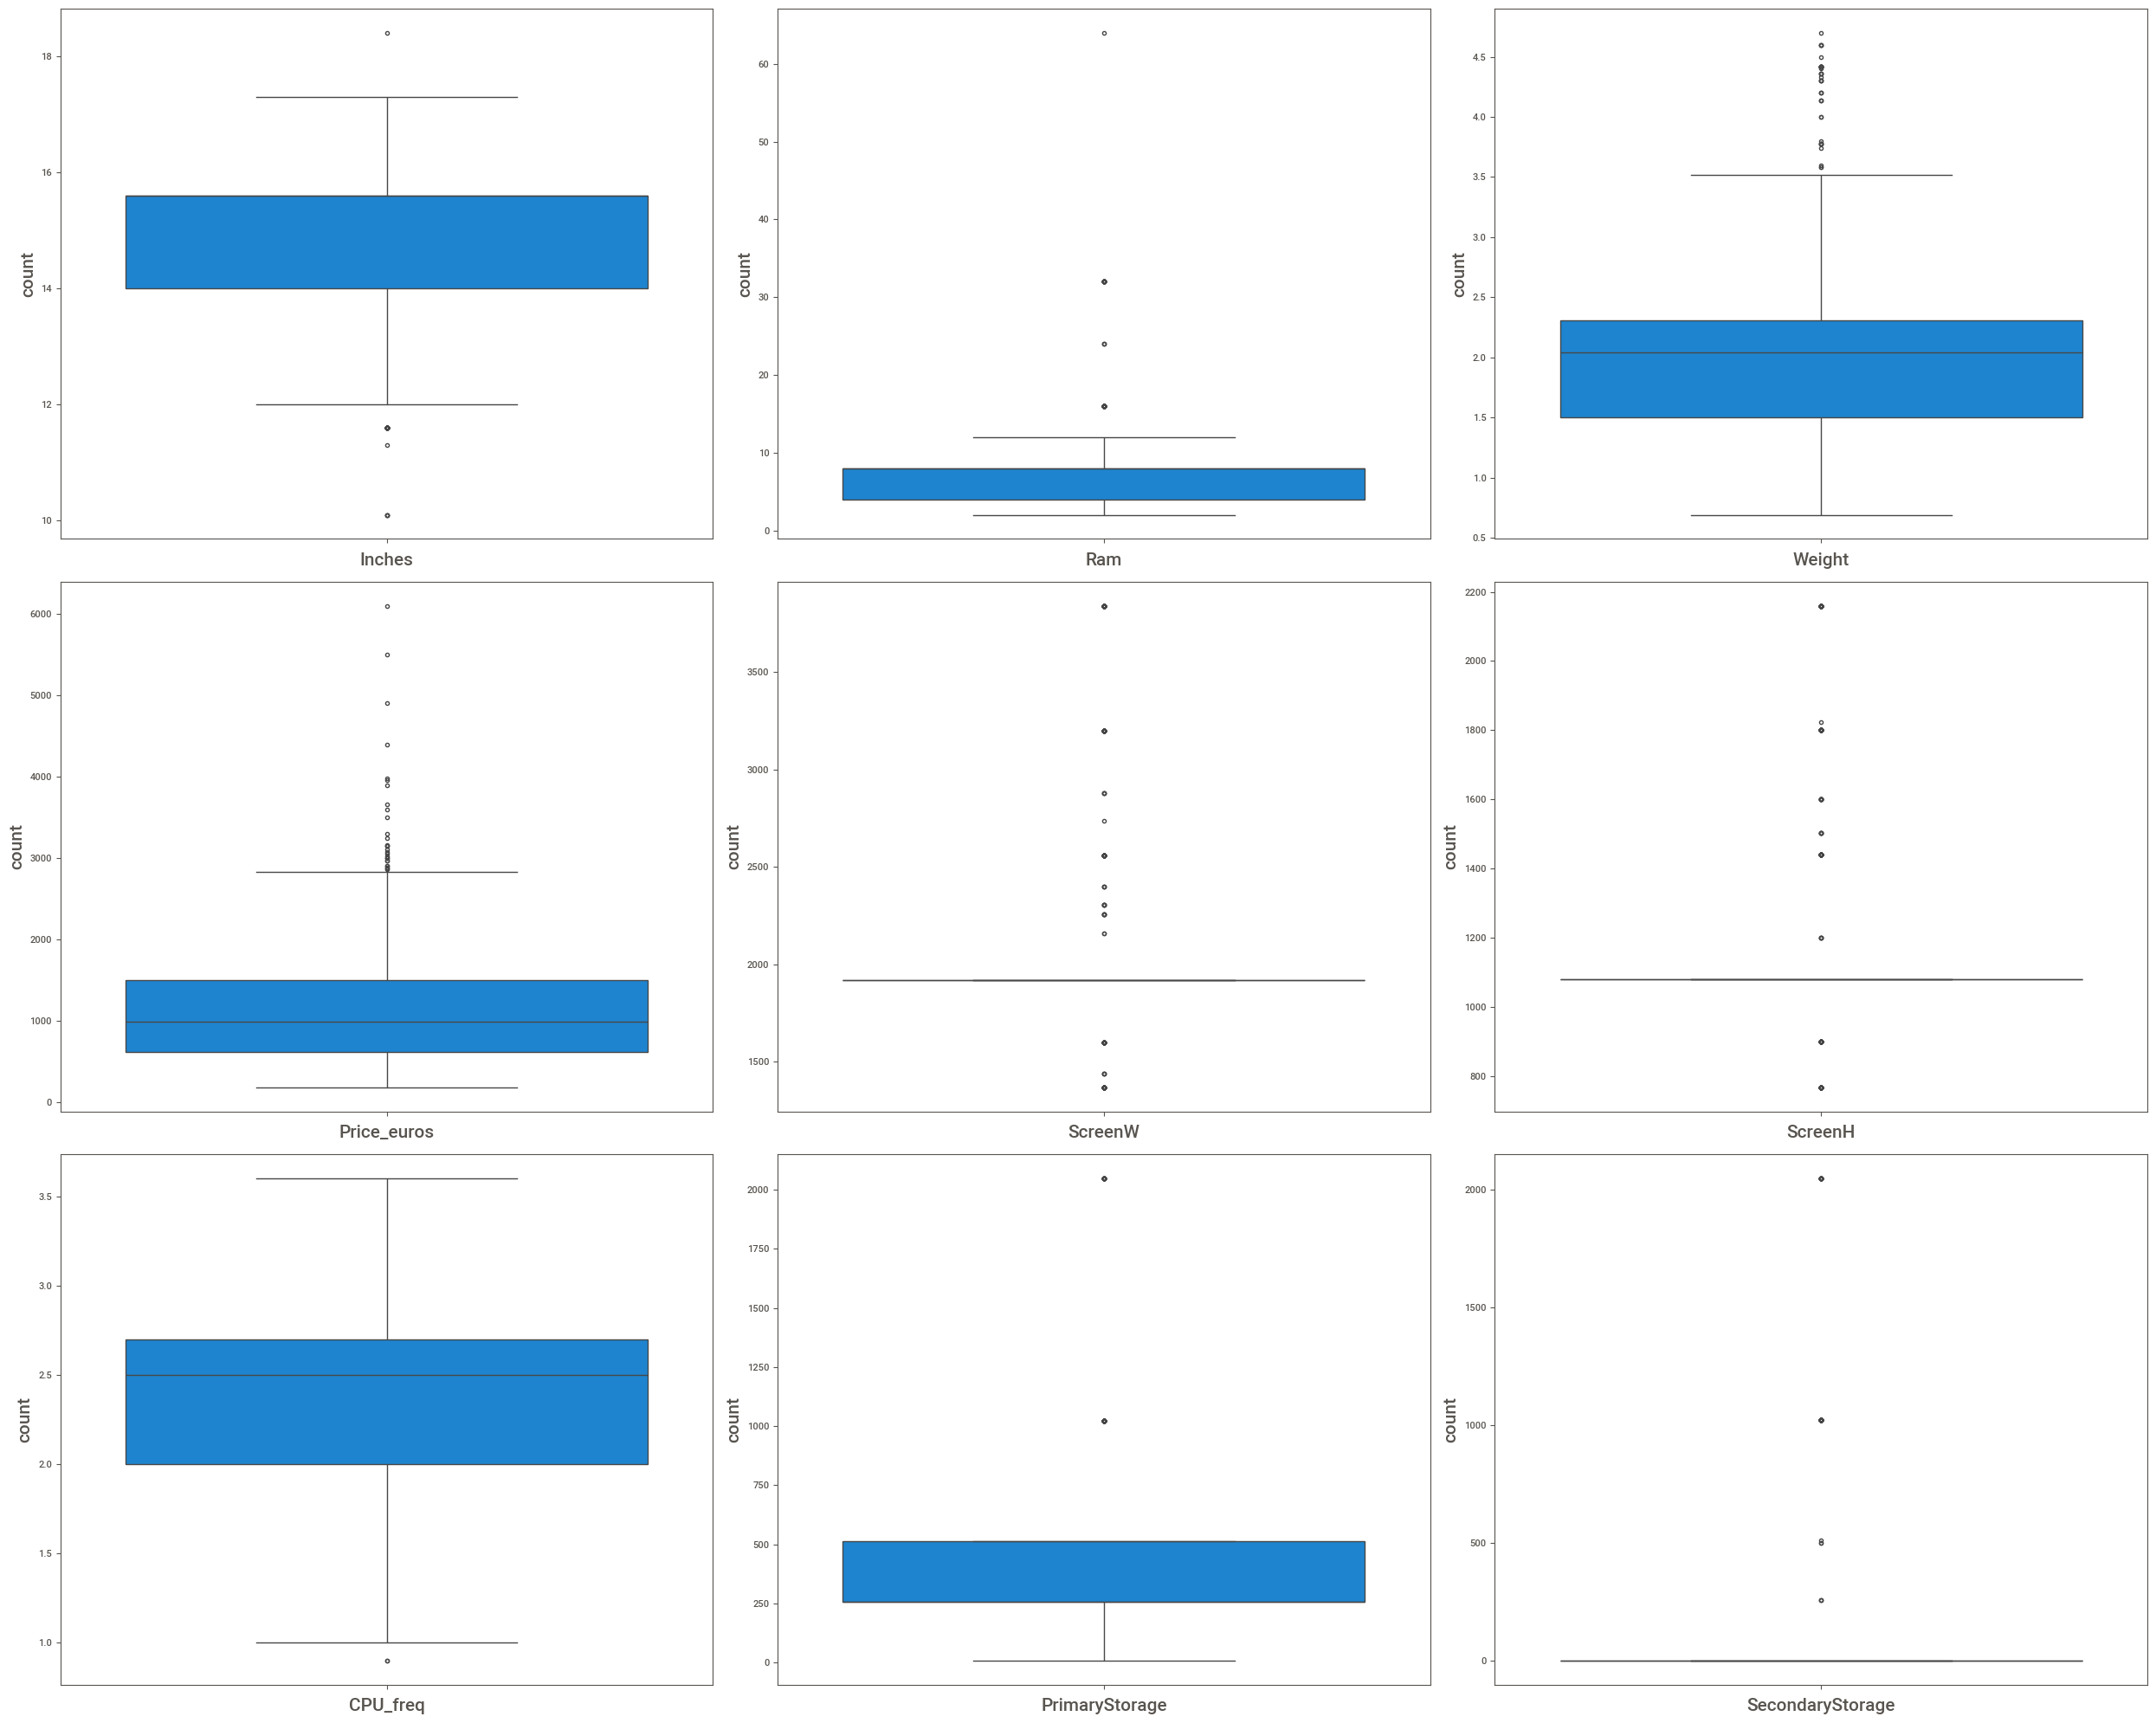

In [82]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in num_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(num_col[i])
        plt.xlabel(i,fontsize=15)
        plt.ylabel('count',fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Encoding using map

In [83]:
drop_col = data[['Product','CPU_model','GPU_model','Weight']]  ## This columns is not importent for my model
data.drop(drop_col,axis=1,inplace=True)

In [84]:
data.nunique()

Company                  19
TypeName                  6
Inches                   17
Ram                       9
OS                        9
Price_euros             767
Screen                    4
ScreenW                  13
ScreenH                  10
Touchscreen               2
IPSpanel                  2
RetinaDisplay             2
CPU_company               3
CPU_freq                 24
PrimaryStorage           13
SecondaryStorage          6
PrimaryStorageType        4
SecondaryStorageType      4
GPU_company               4
dtype: int64

In [85]:
data.head(2)

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,Apple,Ultrabook,13.3,8,macOS,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,128,0,SSD,No,Intel
1,Apple,Ultrabook,13.3,8,macOS,898.94,Standard,1440,900,No,No,No,Intel,1.8,128,0,Flash Storage,No,Intel


In [86]:
data.Company.value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [87]:
data.Company = data.Company.map({'Dell':18,'Lenovo':17,'HP':16,'Asus':15,'Acer':14,'MSI':13,'Toshiba':12,'Apple':11,'Samsung':10,'Razer':9,
                                 'Mediacom':8,'Microsoft':7,'Xiaomi':6,'Vero':5,'Chuwi':4,'Google':3,'Fujitsu':2,'LG':1,'Huawei':0})

In [88]:
data.head(2)

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,11,Ultrabook,13.3,8,macOS,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,128,0,SSD,No,Intel
1,11,Ultrabook,13.3,8,macOS,898.94,Standard,1440,900,No,No,No,Intel,1.8,128,0,Flash Storage,No,Intel


In [89]:
## TypeName 
data.TypeName.value_counts()

TypeName
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64

In [90]:
data.TypeName = data.TypeName.map({'Notebook':6,'Notebook':5,'Gaming':4,'Ultrabook':3,'2 in 1 Convertible':2,'Workstation':1,'Netbook':0})

In [91]:
data.head(2)

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,11,3,13.3,8,macOS,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,128,0,SSD,No,Intel
1,11,3,13.3,8,macOS,898.94,Standard,1440,900,No,No,No,Intel,1.8,128,0,Flash Storage,No,Intel


In [92]:
# OS
data.OS.value_counts()

OS
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [93]:
data.OS = data.OS.map({'Windows 10':8,'No OS':7,'Linux':6,'Windows 7':5,'Chrome OS':4,'macOS':3,'Mac OS X':2,'Windows 10 S':1,'Android':0})

In [94]:
data.head(2)

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,11,3,13.3,8,3,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,128,0,SSD,No,Intel
1,11,3,13.3,8,3,898.94,Standard,1440,900,No,No,No,Intel,1.8,128,0,Flash Storage,No,Intel


In [95]:
# Screen
data.Screen.value_counts()

Screen
Full HD        835
Standard       369
4K Ultra HD     43
Quad HD+        28
Name: count, dtype: int64

In [96]:
data.Screen = data.Screen.map({'Full HD':3,'Standard':2,'4K Ultra HD':1,'Quad HD+':0})

In [97]:
data.head(2)

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,11,3,13.3,8,3,1339.69,2,2560,1600,No,Yes,Yes,Intel,2.3,128,0,SSD,No,Intel
1,11,3,13.3,8,3,898.94,2,1440,900,No,No,No,Intel,1.8,128,0,Flash Storage,No,Intel


In [98]:
# Touchscreen
data.Touchscreen.value_counts()

Touchscreen
No     1087
Yes     188
Name: count, dtype: int64

In [99]:
data.Touchscreen = data.Touchscreen.map({'No':1,'Yes':0})

In [100]:
data.head(2)

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,11,3,13.3,8,3,1339.69,2,2560,1600,1,Yes,Yes,Intel,2.3,128,0,SSD,No,Intel
1,11,3,13.3,8,3,898.94,2,1440,900,1,No,No,Intel,1.8,128,0,Flash Storage,No,Intel


In [101]:
# IPSpanel
data.IPSpanel.value_counts()

IPSpanel
No     918
Yes    357
Name: count, dtype: int64

In [102]:
data.IPSpanel = data.IPSpanel.map({'No':1,'Yes':0})

In [103]:
data.head(2)

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,11,3,13.3,8,3,1339.69,2,2560,1600,1,0,Yes,Intel,2.3,128,0,SSD,No,Intel
1,11,3,13.3,8,3,898.94,2,1440,900,1,1,No,Intel,1.8,128,0,Flash Storage,No,Intel


In [104]:
# RetinaDisplay
data.RetinaDisplay.value_counts()

RetinaDisplay
No     1258
Yes      17
Name: count, dtype: int64

In [105]:
data.RetinaDisplay = data.RetinaDisplay.map({'No':1,'Yes':0})

In [106]:
data.head(2)

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,11,3,13.3,8,3,1339.69,2,2560,1600,1,0,0,Intel,2.3,128,0,SSD,No,Intel
1,11,3,13.3,8,3,898.94,2,1440,900,1,1,1,Intel,1.8,128,0,Flash Storage,No,Intel


In [107]:
# CPU_company
data.CPU_company.value_counts()

CPU_company
Intel      1214
AMD          60
Samsung       1
Name: count, dtype: int64

In [108]:
data.CPU_company = data.CPU_company.map({'Intel':2,'AMD':1,'Samsung':0})

In [109]:
data.head(2)

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,11,3,13.3,8,3,1339.69,2,2560,1600,1,0,0,2,2.3,128,0,SSD,No,Intel
1,11,3,13.3,8,3,898.94,2,1440,900,1,1,1,2,1.8,128,0,Flash Storage,No,Intel


In [110]:
# PrimaryStorageType
data.PrimaryStorageType.value_counts()

PrimaryStorageType
SSD              837
HDD              359
Flash Storage     71
Hybrid             8
Name: count, dtype: int64

In [111]:
data.PrimaryStorageType = data.PrimaryStorageType.map({'SSD':3,'HDD':2,'Flash Storage':1,'Hybrid':0})

In [112]:
data.head(2)

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,11,3,13.3,8,3,1339.69,2,2560,1600,1,0,0,2,2.3,128,0,3,No,Intel
1,11,3,13.3,8,3,898.94,2,1440,900,1,1,1,2,1.8,128,0,1,No,Intel


In [113]:
# SecondaryStorageType
data.SecondaryStorageType.value_counts()

SecondaryStorageType
No        1067
HDD        202
SSD          4
Hybrid       2
Name: count, dtype: int64

In [114]:
data.SecondaryStorageType = data.SecondaryStorageType.map({'No':3,'HDD':2,'SSD':1,'Hybrid':0})

In [115]:
data.head(2)

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,11,3,13.3,8,3,1339.69,2,2560,1600,1,0,0,2,2.3,128,0,3,3,Intel
1,11,3,13.3,8,3,898.94,2,1440,900,1,1,1,2,1.8,128,0,1,3,Intel


In [116]:
data.GPU_company.value_counts()

GPU_company
Intel     704
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [117]:
data.GPU_company = data.GPU_company.map({'Intel':3,'Nvidia':2,'AMD':1,'ARM':0})
data.head()

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,11,3,13.3,8,3,1339.69,2,2560,1600,1,0,0,2,2.3,128,0,3,3,3
1,11,3,13.3,8,3,898.94,2,1440,900,1,1,1,2,1.8,128,0,1,3,3
2,16,5,15.6,8,7,575.00,3,1920,1080,1,1,1,2,2.5,256,0,3,3,3
3,11,3,15.4,16,3,2537.45,2,2880,1800,1,0,0,2,2.7,512,0,3,3,1
4,11,3,13.3,8,3,1803.60,2,2560,1600,1,0,0,2,3.1,256,0,3,3,3


In [118]:
## Check Corr-relation

<Axes: >

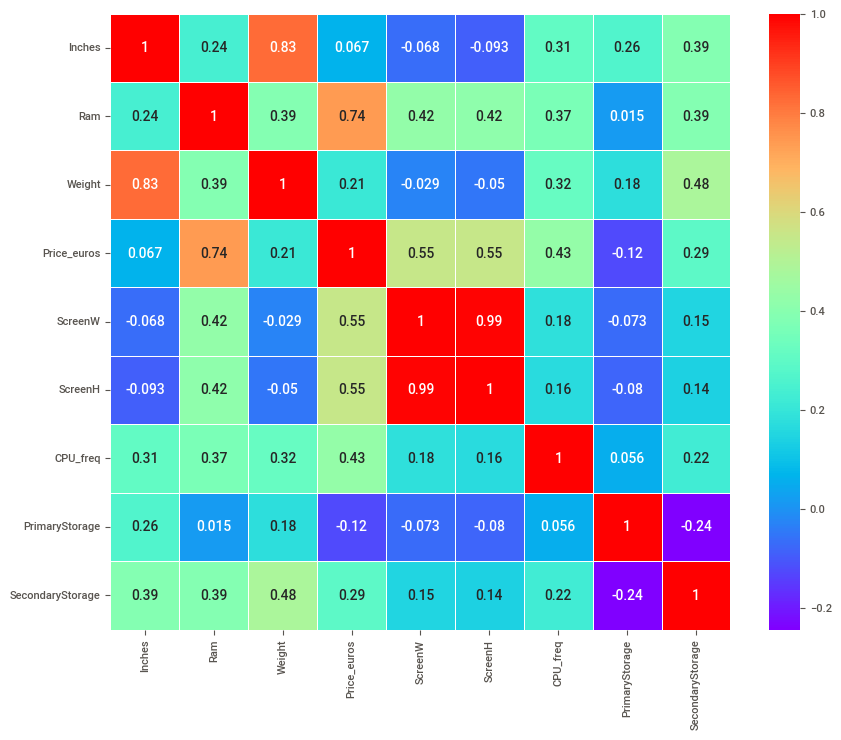

In [119]:
plt.figure(figsize=(10,8))
sns.heatmap(num_col.corr(),annot=True,cmap='rainbow',linewidth=0.5)

In [120]:
data.head()

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,11,3,13.3,8,3,1339.69,2,2560,1600,1,0,0,2,2.3,128,0,3,3,3
1,11,3,13.3,8,3,898.94,2,1440,900,1,1,1,2,1.8,128,0,1,3,3
2,16,5,15.6,8,7,575.00,3,1920,1080,1,1,1,2,2.5,256,0,3,3,3
3,11,3,15.4,16,3,2537.45,2,2880,1800,1,0,0,2,2.7,512,0,3,3,1
4,11,3,13.3,8,3,1803.60,2,2560,1600,1,0,0,2,3.1,256,0,3,3,3


In [121]:
data1 = data.copy()

In [122]:
## scale the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data1[['Company', 'TypeName', 'Inches', 'Ram', 'OS', 'Screen',
       'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay',
       'CPU_company', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage',
       'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company']] = scale.fit_transform(data1[['Company', 'TypeName', 'Inches', 'Ram', 'OS', 'Screen',
       'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay',
       'CPU_company', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage',
       'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company']])

In [123]:
data1.head(3)

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,-1.769916,-0.863185,-1.206780,-0.086499,-3.631897,1339.69,-0.867051,1.338239,1.853934,0.415876,-1.603567,-8.602325,0.222344,-0.010967,-0.866236,-0.423449,0.658310,0.428379,0.812261
1,-1.769916,-0.863185,-1.206780,-0.086499,-3.631897,898.94,-0.867051,-0.932863,-0.612830,0.415876,0.623610,0.116248,0.222344,-1.009712,-0.866236,-0.423449,-2.539197,0.428379,0.812261
2,0.128976,0.737631,0.406275,-0.086499,-0.418944,575.00,0.634973,0.040466,0.021481,0.415876,0.623610,0.116248,0.222344,0.388532,-0.515929,-0.423449,0.658310,0.428379,0.812261


In [124]:
# create X and y
X = data1.drop('Price_euros',axis=1)
y = data1.Price_euros

In [125]:
X.head(2)

,Company,TypeName,Inches,Ram,OS,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,-1.769916,-0.863185,-1.20678,-0.086499,-3.631897,-0.867051,1.338239,1.853934,0.415876,-1.603567,-8.602325,0.222344,-0.010967,-0.866236,-0.423449,0.658310,0.428379,0.812261
1,-1.769916,-0.863185,-1.20678,-0.086499,-3.631897,-0.867051,-0.932863,-0.612830,0.415876,0.623610,0.116248,0.222344,-1.009712,-0.866236,-0.423449,-2.539197,0.428379,0.812261


In [126]:
y.head(2)

0    1339.69
1     898.94
Name: Price_euros, dtype: float64

In [127]:
## split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=14)

In [128]:
X_train.head()

,Company,TypeName,Inches,Ram,OS,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
29,0.128976,0.737631,1.598534,-0.086499,0.384294,0.634973,0.040466,0.021481,0.415876,0.623610,0.116248,0.222344,-1.409210,1.585909,-0.423449,-0.940443,0.428379,-0.574128
888,-0.630581,-3.264409,-2.399038,-0.871458,-2.828659,-0.867051,-1.082918,-1.077991,0.415876,-1.603567,0.116248,0.222344,-1.409210,-1.128966,-0.423449,-2.539197,0.428379,0.812261
1036,0.128976,0.737631,0.406275,-0.871458,0.384294,-0.867051,-1.082918,-1.077991,0.415876,0.623610,0.116248,0.222344,0.388532,0.151842,-0.423449,-0.940443,0.428379,0.812261
137,-0.250803,-0.062777,1.598534,-0.086499,0.384294,0.634973,0.040466,0.021481,0.415876,0.623610,0.116248,0.222344,0.388532,-0.866236,2.039288,0.658310,-2.100248,-0.574128
1235,0.128976,0.737631,0.406275,-0.871458,0.384294,0.634973,0.040466,0.021481,0.415876,0.623610,0.116248,0.222344,-0.610214,1.585909,-0.423449,-0.940443,0.428379,0.812261


In [129]:
y_train.head()

29      896.0
888     297.0
1036    742.0
137     938.0
1235    478.0
Name: Price_euros, dtype: float64

# Create the Models

## Model 1 :- XGBoost

In [130]:
## check metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [131]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=250,
                   learning_rate=0.06,
                   max_depth=8,
                   min_child_weight=4,
                   subsample=0.8,
                   colsample_bytree=0.8,
                   gamma=0.001,
                   reg_alpha=0.1,
                   reg_lambda=1.5,
                   verbosity=2)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
print('r2_score:',r2_score(y_test,xgb_pred))
print('MSE:',mean_squared_error(y_test,xgb_pred))
print('MAE:',mean_absolute_error(y_test,xgb_pred))

r2_score: 0.8095940415396253
MSE: 68190.69121542733
MAE: 178.64966681740307


In [132]:
## check cross val score 
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb,X,y,cv = 3, scoring='r2')
print(score)
print("Cross validation Score:",score.mean())
print("Std :",score.std())

[0.78818505 0.75272391 0.71948175]
Cross validation Score: 0.7534635675448267
Std : 0.028052878214921046


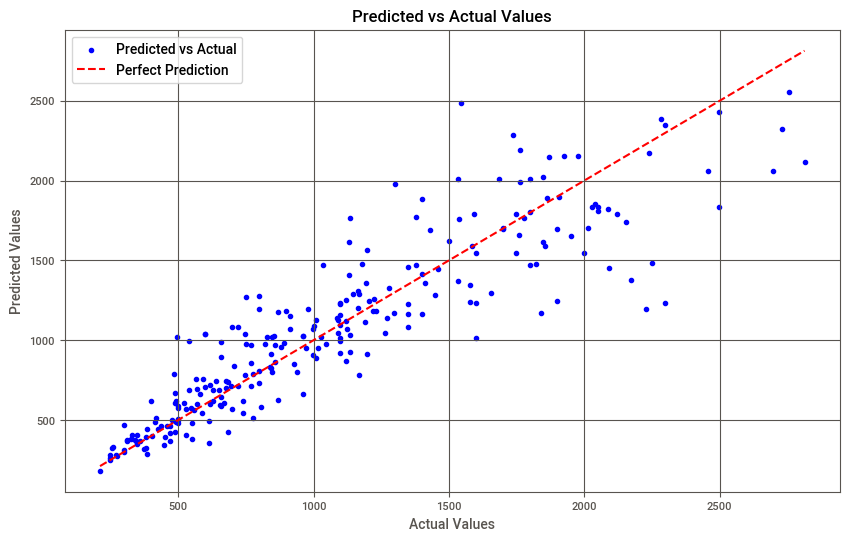

In [133]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

## Model 2 :- Bagging

In [134]:
from sklearn.ensemble import BaggingRegressor
bagg = BaggingRegressor(base_estimator=xgb,
                         n_estimators=100,
                         max_samples=1.0,
                         max_features=1.0,
                         bootstrap=True)
bagg.fit(X_train,y_train)
bagg_pred = bagg.predict(X_test)
print('r2_score:',r2_score(y_test,bagg_pred))
print('MSE:',mean_squared_error(y_test,bagg_pred))
print('MAE:',mean_absolute_error(y_test,bagg_pred))

r2_score: 0.7939348903772581
MSE: 73798.75280259088
MAE: 184.72789627151928


In [135]:
## check cross val score 
from sklearn.model_selection import cross_val_score
score = cross_val_score(bagg,X,y,cv = 3, scoring='r2')
print(score)
print("Cross validation Score:",score.mean())
print("Std :",score.std())

[0.78164448 0.75824136 0.72972746]
Cross validation Score: 0.7565377661393332
Std : 0.02122923640277281


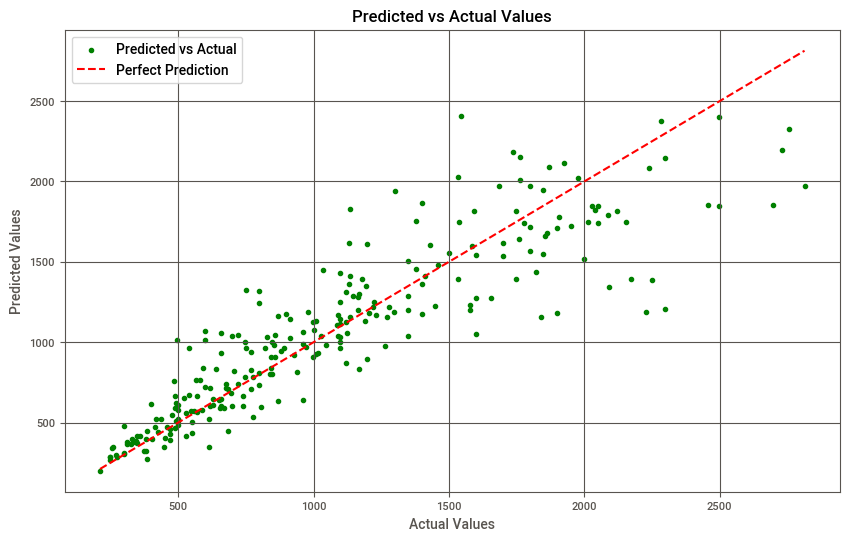

In [136]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, bagg_pred, color='Green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

## Model 3 :- Random Forest

In [137]:
## Search Best Paramaters for My Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
              'max_depth':(list(range(1,20))),
              'min_samples_split':(list(range(1,10))),
              'min_samples_leaf':(list(range(1,6))),
              'max_features':['auto','sqrt','log2'],
              'bootstrap':[True,False]
             }


rf = RandomForestRegressor()
rand_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=3, scoring='r2', verbose=2,n_jobs=-1,n_iter=100,random_state=42)

rand_search.fit(X_train, y_train)
best_n_estimators = rand_search.best_params_
print(f'Best Paramaters:{best_n_estimators}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Paramaters:{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 17, 'bootstrap': False}


In [149]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,
                           min_samples_split=4,
                           min_samples_leaf=2,
                           max_features='sqrt',
                           max_depth=17,
                           bootstrap=False)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print('r2_score:',r2_score(y_test,rf_pred))
print('MSE:',mean_squared_error(y_test,rf_pred))
print('MAE:',mean_absolute_error(y_test,rf_pred))

r2_score: 0.7756082345628819
MSE: 80362.13631093639
MAE: 198.83274545664403


In [139]:
## check cross val score 
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf,X,y,cv = 3, scoring='r2')
print(score)
print("Cross validation Score:",score.mean())
print("Std :",score.std())

[0.7525061  0.74618841 0.70516439]
Cross validation Score: 0.7346196358100868
Std : 0.020987089618488032


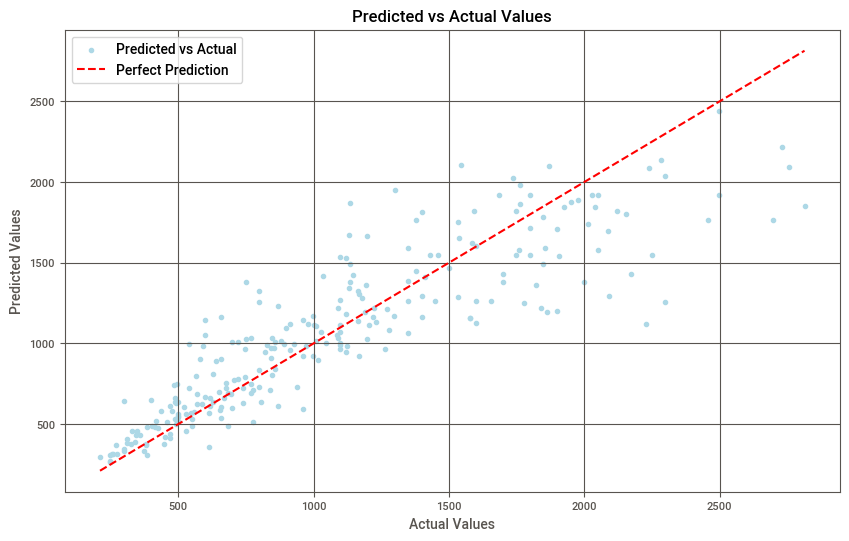

In [140]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, color='lightblue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

## Model 4 :- Gradient Boosting

In [141]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(X_train,y_train)
GB_pred = GB.predict(X_test)
print('r2_score:',r2_score(y_test,GB_pred))
print('MSE:',mean_squared_error(y_test,GB_pred))
print('MSE:',mean_absolute_error(y_test,GB_pred))

## check cross val score 
from sklearn.model_selection import cross_val_score
score = cross_val_score(GB,X,y,cv = 3, scoring='r2')
print(f'Score:{score}')
print("Cross validation Score:",score.mean())
print("Std :",score.std())

r2_score: 0.7383511290315178
MSE: 93705.14195746693
MSE: 212.77893121702394
Score:[0.7000596  0.72837798 0.70211048]
Cross validation Score: 0.7101826877307351
Std : 0.012893227130673552


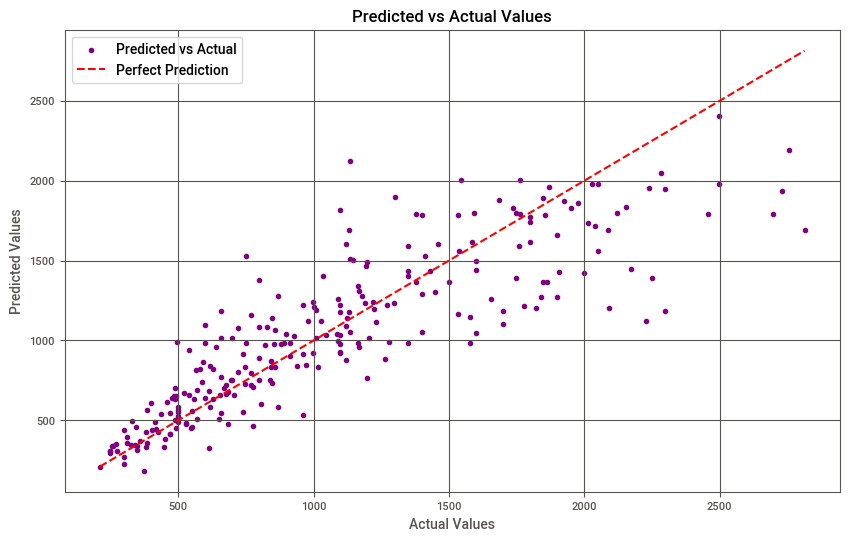

In [142]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, GB_pred, color='purple', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()


## Model 5 :- Decision Tree

In [143]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
print('r2_score:',r2_score(y_test,dt_pred))
print('MSE:',mean_squared_error(y_test,dt_pred))
print('MSE:',mean_absolute_error(y_test,dt_pred))

r2_score: 0.6875616424155555
MSE: 111894.54226207941
MSE: 221.488479277594


## Model 6 :- K-Nearest Neighbors

In [144]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print('r2_score:',r2_score(y_test,knn_pred))
print('MSE:',mean_squared_error(y_test,knn_pred))
print('MAE:',mean_absolute_error(y_test,knn_pred))

r2_score: 0.7244396933370827
MSE: 98687.28864800719
MAE: 220.86792895040372


## Model Comparison

## Comparison using Graph

In [161]:
df = pd.DataFrame()
df['Model'] = ['XGBoost','Bagging','Random Forest','Gradient Boosting','Decision Tree','K-Nearest Neighbors']
df['r2'] = [81,80,77,73,68,72]
df['MAE'] = [178,184,198,212,221,220]
df

,Model,r2,MAE
0,XGBoost,81,178
1,Bagging,80,184
2,Random Forest,77,198
3,Gradient Boosting,73,212
4,Decision Tree,68,221
5,K-Nearest Neighbors,72,220


In [162]:
from prettytable import PrettyTable
table = PrettyTable(['XGBoost','Bagging','Random Forest','Gradient Boosting','Decision Tree','K-Nearest Neighbors'])
table.add_row([81,80,77,73,68,72])
table.add_row([178,184,198,212,221,220])
print(table)                   

+---------+---------+---------------+-------------------+---------------+---------------------+
| XGBoost | Bagging | Random Forest | Gradient Boosting | Decision Tree | K-Nearest Neighbors |
+---------+---------+---------------+-------------------+---------------+---------------------+
|    81   |    80   |       77      |         73        |       68      |          72         |
|   178   |   184   |      198      |        212        |      221      |         220         |
+---------+---------+---------------+-------------------+---------------+---------------------+


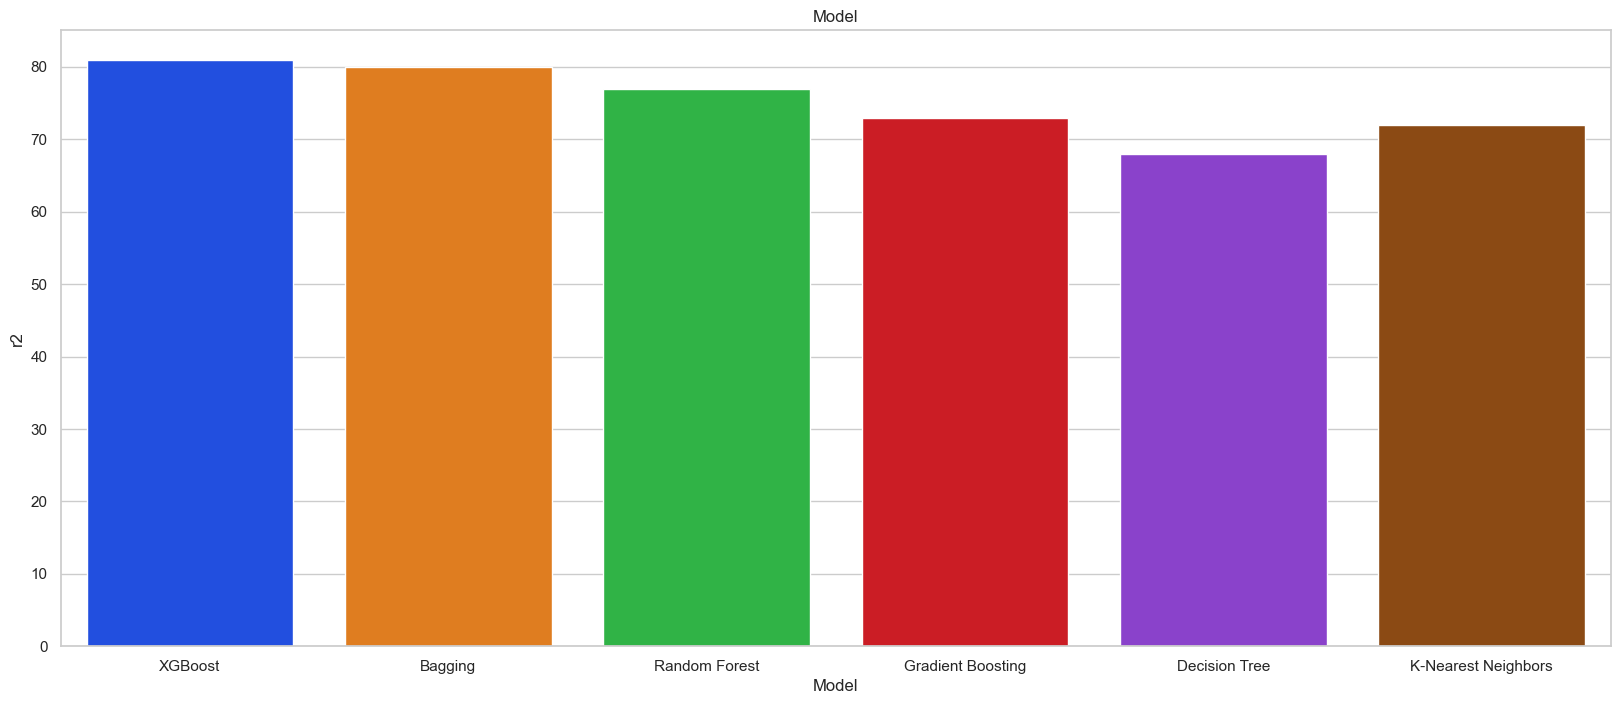

In [163]:
plt.figure(figsize=(20,8))
sns.set(style='whitegrid')
sns.barplot(x='Model',y='r2',data=df,palette='bright')
plt.title('Model')
plt.show()

# Summary

- **XGBoost** has the best performance with the highest r² value (80) and the lowest MAE (178).
- **Bagging** also performs well, with slightly lower r² (79) and higher MAE (184).
- **Decision Tree** has the lowest r² (68) and the highest MAE (224), indicating the weakest performance in this comparison.

In [152]:
import pickle 
pickle.dump(xgb,open('model.pkl','wb'))